### Jupyter for making figure for fastDMF+plastic FIC
#### I.- Inhibitory homeostatic plasticity rule enhances model stability and plausibility
    
    1.- Decay vs Learning rate relationship for different objective firing rates    
    2.- Firing Rate comparison between static vs dynamic FIC    
    3.- Convergence of dynamic FIC to the linear solution
    4.- Comparison of firing rate under neuromodulation


#### II.- Fitting to fMRI

    1.- Objective function for static and dynamics FIC for FC    
    2.- Violin plot of the fit to FC at the optimum    
    3.- Objective function for static and dynamics FIC for FCD    
    4.- Violin plot of the fit to FCD at the optimum


#### III.- A potential mechanism for whole-brain slow-waves
    1.- G vs LR Parameter space with autocorrelation peak
    2.- G vs LR Parameter space with autocorrelation time to peak
    3.- Average firing rate trace at slow wave region
    4.- Average firing rate trace at no-slow wave region (best fit to wake data)

In [1]:
# ! pip install mat73

In [1]:
import os
import time
import seaborn as sns
import numpy as np
import pandas as pd
# import fastdyn_fic_dmf as dmf
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.io import loadmat
from scipy import stats
import mat73
from scipy.stats import pearsonr
from scipy.spatial.distance import cdist
from matplotlib.gridspec import GridSpec
from helper_functions import filter_bold
from nilearn import plotting, datasets
import matplotlib.pyplot as plt
import numpy as np


datafolder = '/home/ivan.mindlin/Desktop/DatosParaRuben/'
figfold = '/home/ivan.mindlin/Desktop/DatosParaRuben/Figuras/panels/'

category_colors = {
    'Static': '#FF1F5B',     # Dark orange
    'Dynamic': '#00CD6C',    # Teal
    'LowLR': '#5F9EA0',      # Slate blue / cadet blue
    'HighLR': '#A93226',     # Dark red
    'STR': '#009E73',        # Green (same as Dynamic, can adjust if needed)
    'SCORE': '#882E72'       # Purple
}






### I.- Inhibitory homeostatic plasticity rule enhances model stability and plausibility

### Fig 1

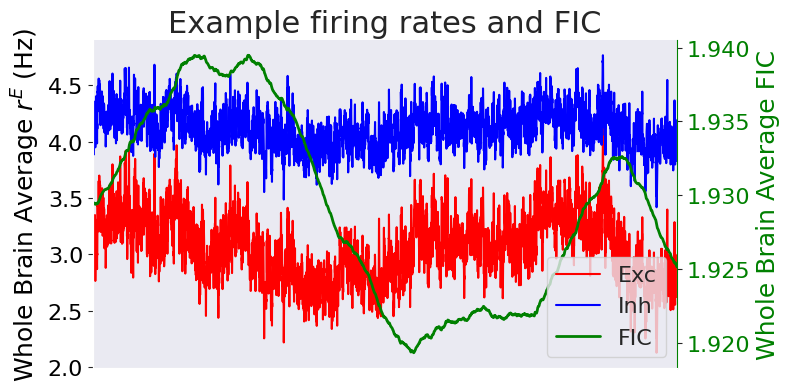

In [2]:
sns.set_style("dark")

# Font sizes
TITLE = 22
LABEL = 18
TICKS = 16
LEGEND = 16


rates = np.load('/home/ivan.mindlin/Desktop/DatosParaRuben/ChequeoPreliminar/example_rates.npy')
rates_inh = np.load( '/home/ivan.mindlin/Desktop/DatosParaRuben/ChequeoPreliminar/example_rates_inh.npy')
bold = np.load('/home/ivan.mindlin/Desktop/DatosParaRuben/ChequeoPreliminar/example_bold.npy')
fic_t = np.load( '/home/ivan.mindlin/Desktop/DatosParaRuben/ChequeoPreliminar/example_fic_t.npy')


# Parameters
figname = 'FIG_1'

# Example data (replace these with your actual data)
acor_tbase = np.arange(5000)#np.arange(rates.shape[1])  # x-axis data
max_t = len(acor_tbase)

# Create the figure and primary axis
fig, ax = plt.subplots(figsize=(8, 4))

# Plot 'rates' data on the primary y-axis
ax.plot(acor_tbase, np.mean(rates[:,:max_t], axis=0), color='red', label='Exc')
ax.plot(acor_tbase, np.mean(rates_inh[:,:max_t], axis=0), color='blue', label='Inh')

# Labels and title for the primary axis
ax.set_ylabel('Whole Brain Average $r^E$ (Hz)', color='black', fontsize=LABEL)
ax.set_title('Example firing rates and FIC', fontsize=TITLE)
ax.tick_params(axis='y', labelcolor='black', labelsize=TICKS)
ax.set_xlim([0, max_t])

# Create a twin axis sharing the same x-axis for 'fic_t'
ax2 = ax.twinx()
ax2.plot(acor_tbase, np.mean(fic_t[:,:max_t], axis=0), color='green', linewidth=2, label='FIC')

# Labels for the secondary axis
ax2.set_ylabel('Whole Brain Average FIC', color='green', fontsize=LABEL)
ax2.tick_params(axis='y', labelcolor='green', labelsize=TICKS)
ax2.spines['right'].set_color('green')

# Customize spines for a cleaner look
ax.spines['top'].set_visible(False)
ax2.spines['top'].set_visible(False)

# Optionally hide x-axis labels and ticks
ax.set_xticklabels([])
ax.set_xlabel('')  # Comment this line if you want the x-axis label

# Add legends for both axes
lines_1, labels_1 = ax.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax2.legend(lines_1 + lines_2, labels_1 + labels_2, loc='lower right', fontsize=LEGEND)

# Layout and save
plt.tight_layout()
#fig.savefig(figfold + figname + '_A.svg', dpi=300)
#fig.savefig(figfold + figname + '_A.png', dpi=300)
plt.show()


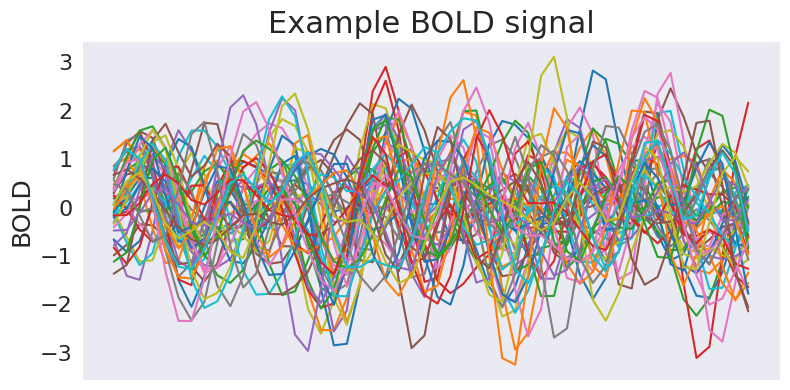

In [3]:
from helper_functions import filter_bold
# PLot the BOLD signal as Fig_1_b
# Parameters
figname = 'FIG_1'
plt.figure(figsize=(8, 4))
bold = filter_bold(bold.T, 0.01, 0.1, 2)
plt.plot(bold[:50,:50])

plt.title('Example BOLD signal', fontsize=TITLE)
plt.ylabel('BOLD', fontsize=LABEL)
#plt.xlabel('Time (s)', fontsize=LABEL)
plt.xlabel('')
#plt.xticks(fontsize=TICKS)
# Elminate xticklabels
plt.xticks([])
plt.yticks(fontsize=TICKS)

plt.tight_layout()
#plt.savefig(figfold + figname + '_B.svg', dpi=300)
#plt.savefig(figfold + figname + '_B.png', dpi=300)


In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
from nilearn import datasets, plotting

# Load connectivity matrix
C = loadmat('./data/DTI_fiber_consensus_HCP.mat')['connectivity'][:200, :200]

# Fetch Schaefer atlas (200 regions)
atlas = datasets.fetch_atlas_schaefer_2018(n_rois=200)
atlas_img = atlas.maps

# Obtain coordinates from atlas image
coords = plotting.find_parcellation_cut_coords(atlas_img)

# Ensure SC matrix size matches coordinates
assert C.shape[0] == len(coords), f"Mismatch: SC matrix ({C.shape[0]}), coordinates ({len(coords)})"



[get_dataset_dir] Dataset found in /home/ivan.mindlin/nilearn_data/schaefer_2018


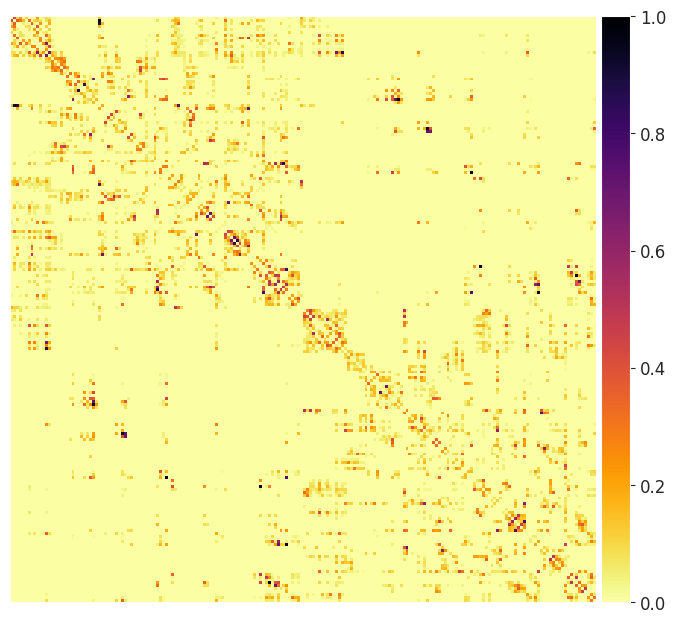

In [15]:
# Create a figure with one subplot
fig, ax = plt.subplots(figsize=(8, 8))
# normalize by the max value the SC matrix
C = C / np.max(C)
# Plot the connectivity matrix
disp = plotting.plot_matrix(C, colorbar=True, cmap='inferno_r', axes=ax)

# Adjust the colorbar position
cbar = disp.colorbar
cbar.ax.yaxis.set_ticks_position('right')  # Move ticks to the right
cbar.ax.yaxis.set_tick_params(labelsize=12)  # Adjust tick label size

# Remove ticks from the matrix plot
disp.axes.set_xticks([])
disp.axes.set_yticks([])

# Save the figure as SVG and PNG
fig.savefig(figfold + figname + '_C.svg', dpi=300, bbox_inches='tight')
fig.savefig(figfold + figname + '_C.png', dpi=300, bbox_inches='tight')

plt.show()

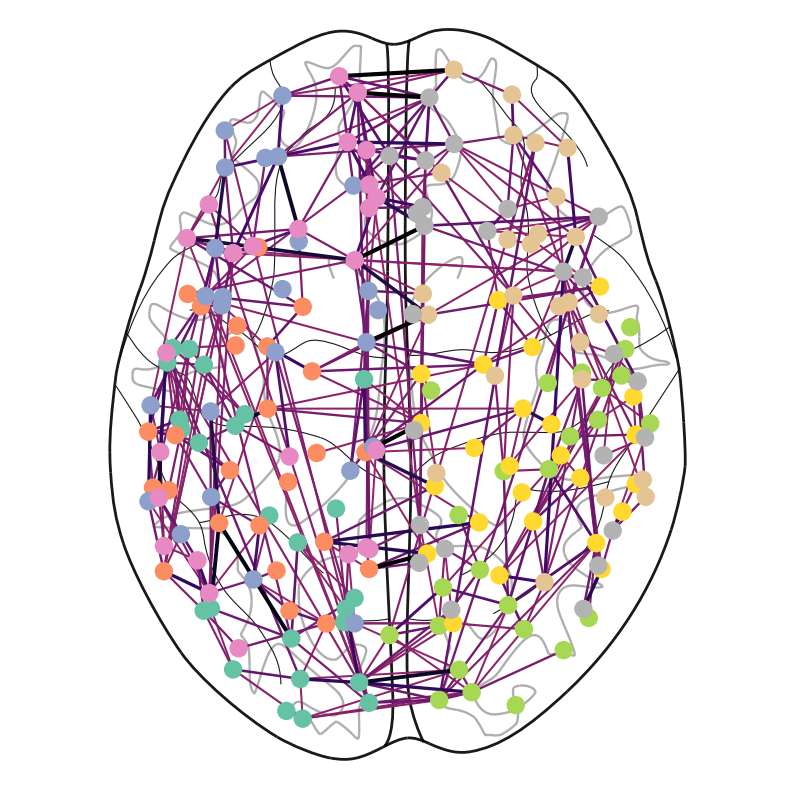

<Figure size 640x480 with 0 Axes>

In [16]:

fig,ax = plt.subplots(figsize=(10,10))
# Plot connectome on brain surface
plotting.plot_connectome(C, coords, axes=ax,
                         node_size=150, edge_threshold="98%",
                         edge_cmap='inferno_r', display_mode='z',annotate=False,alpha=0.9)


plt.show()
plt.tight_layout()
fig.savefig(figfold + figname + '_D.svg', dpi=300)
fig.savefig(figfold + figname + '_D.png', dpi=300)

#### Homeostatic Fit

In [ ]:
# HOMEOSTATIC FIT
# Extracting averages over the range of G


# Homeostatic fit
hom_fit_list = [] # 0=1.22, 1=3.44, 2=6.88, 3=50
hom_fit_list.append(np.load(datafolder+'ChequeoPreliminar/HomeostaticFit1-22-Grid/hom_grid.npy'))
hom_fit_list.append(np.load(datafolder+'ChequeoPreliminar/HomeostaticFit3-44-Grid/hom_grid.npy'))
hom_fit_list.append(np.load(datafolder+'ChequeoPreliminar/HomeostaticFit6-88-Grid/hom_grid.npy'))
hom_fit_list.append(np.load(datafolder+'ChequeoPreliminar/HomeostaticFit50-Grid/hom_grid.npy'))


G_range = np.arange(0,8.5, 0.5)
LR_range = np.logspace(0,3,100)
DECAY_range = np.logspace(2,6,110)
obj_rates = [1.22, 3.44, 6.88, 50]

nobjs = len(obj_rates)
ngs = len(G_range)
nlr = len(LR_range)
ndec = len(DECAY_range)
lr_labels = [1, 10, 100, 1000]
dec_labels = [100, 1000, 10000, 100000]

# Mean and average over G
mean_hom_fit = [np.mean(x,axis=2) for x in hom_fit_list]
std_hom_fit = [np.std(x,axis=2) for x in hom_fit_list]

# Extracting Minimum mismatch
min_mm_pos = [np.argmin(np.abs(x),axis=0) for x in mean_hom_fit]

# Fitting linear trend
fit_res = list()
fit_res_2plot = list()
for o in range(nobjs):
    if o==0:
        fit_res.append(np.polyfit(LR_range[21:], min_mm_pos[o][21:], 1))
        fit_res_2plot.append(np.polyfit(range(0,nlr)[21:], min_mm_pos[o][21:], 1))
    else:
        fit_res.append(np.polyfit(LR_range, min_mm_pos[o], 1))
        fit_res_2plot.append(np.polyfit(range(0,nlr), min_mm_pos[o], 1))    
    


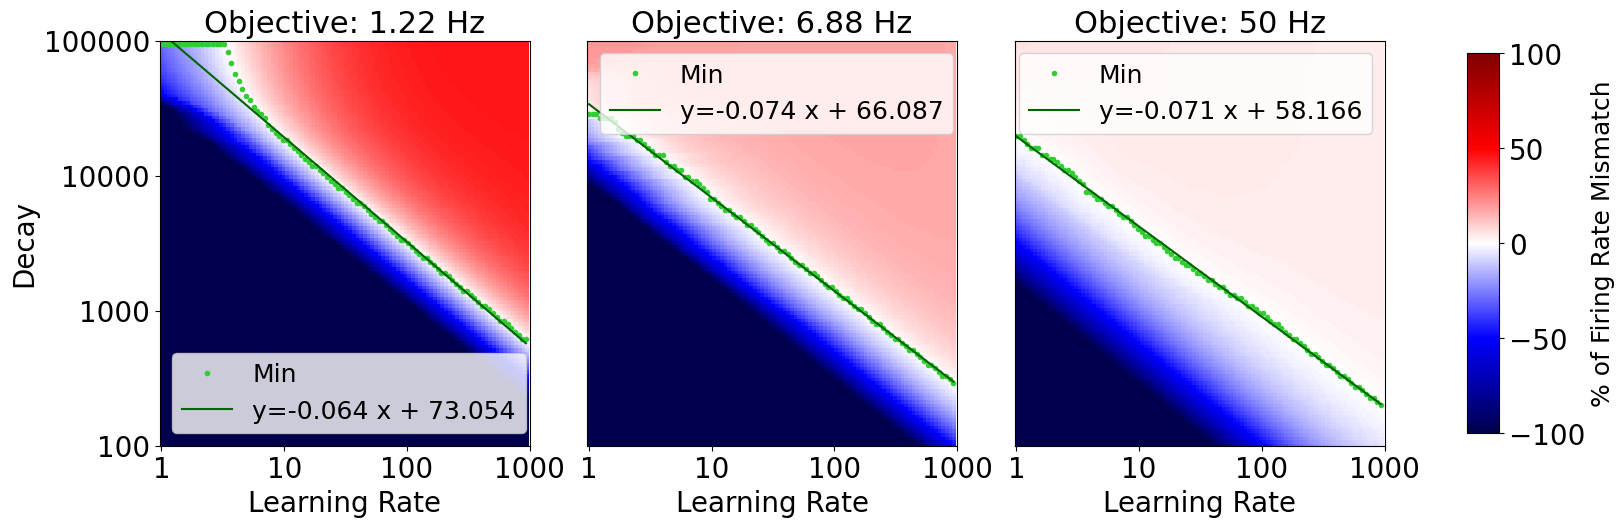

In [ ]:

# Font sizes
TITLE = 22
LABEL = 20
TICKS = 20
LEGEND = 18
COLORBAR = 18

# HOMEOSTATIC FIT
# Extracting averages over the range of G
G_range = np.arange(0,8.5, 0.5)
LR_range = np.logspace(0,3,100)
DECAY_range = np.logspace(2,6,110)
obj_rates = [1.22, 6.88, 50]

nobjs = len(obj_rates)
ngs = len(G_range)
nlr = len(LR_range)
ndec = len(DECAY_range)
lr_labels = [1, 10, 100, 1000]
dec_labels = [100, 1000, 10000, 100000]

# Mean and average over G
mean_hom_fit = [np.mean(x,axis=2) for x in hom_fit_list]
std_hom_fit = [np.std(x,axis=2) for x in hom_fit_list]

# Extracting Minimum mismatch
min_mm_pos = [np.argmin(np.abs(x),axis=0) for x in mean_hom_fit]

# Fitting linear trend
fit_res = list()
fit_res_2plot = list()
for o in range(nobjs):
    if o==0:
        fit_res.append(np.polyfit(LR_range[21:], min_mm_pos[o][21:], 1))
        fit_res_2plot.append(np.polyfit(range(0,nlr)[21:], min_mm_pos[o][21:], 1))
    else:
        fit_res.append(np.polyfit(LR_range, min_mm_pos[o], 1))
        fit_res_2plot.append(np.polyfit(range(0,nlr), min_mm_pos[o], 1))    
    


# Plotting Average over G
figname = 'SUPP_FIG_2_A'
fig = plt.figure(figsize=(16, 10))

for o in range(nobjs):
    # Average over G
    ax = plt.subplot(1, nobjs, o + 1)
    plt.imshow(100 * mean_hom_fit[o] / obj_rates[o], vmin=-100, vmax=100, cmap='seismic', 
               origin='lower', interpolation='none')
    plt.plot(range(0, nlr), min_mm_pos[o], '.', label='Min', color='limegreen')
    plt.plot(range(0, nlr), fit_res_2plot[o][0] * range(0, nlr) + fit_res_2plot[o][1], '-', 
             color='darkgreen',
             label='y=' + "{:.3f}".format(fit_res[o][0]) + ' x + ' + "{:.3f}".format(fit_res[o][1]))        
    
    plt.xticks(ticks=np.linspace(0, nlr, 4), labels=lr_labels, fontsize=TICKS)
    plt.xlabel('Learning Rate', fontsize=LABEL)
    plt.title('Objective: ' + str(obj_rates[o]) + ' Hz', fontsize=TITLE)
    plt.ylim([0, ndec])
    plt.legend(fontsize=LEGEND)
    
    if o == 0:
        plt.yticks(ticks=np.linspace(0, ndec, 4), labels=dec_labels, fontsize=TICKS)   
        plt.ylabel('Decay', fontsize=LABEL)
    else:
        plt.yticks(ticks=[])

plt.tight_layout(rect=[0, 0, 0.9, 1])  # Adjust layout to make space for the colorbar

# Colorbar
cbar_ax = fig.add_axes([0.92, 0.31, 0.02, 0.38])  # Adjust position and size of the colorbar
cbar = plt.colorbar(cax=cbar_ax)
cbar.set_label('% of Firing Rate Mismatch', fontsize=COLORBAR)
cbar.ax.tick_params(labelsize=TICKS)  # Colorbar ticks fontsize

plt.show()

# Save the figure
fig.savefig(figfold + figname + '.png', dpi=300, bbox_inches='tight')
fig.savefig(figfold + figname + '.svg', dpi=300, bbox_inches='tight')


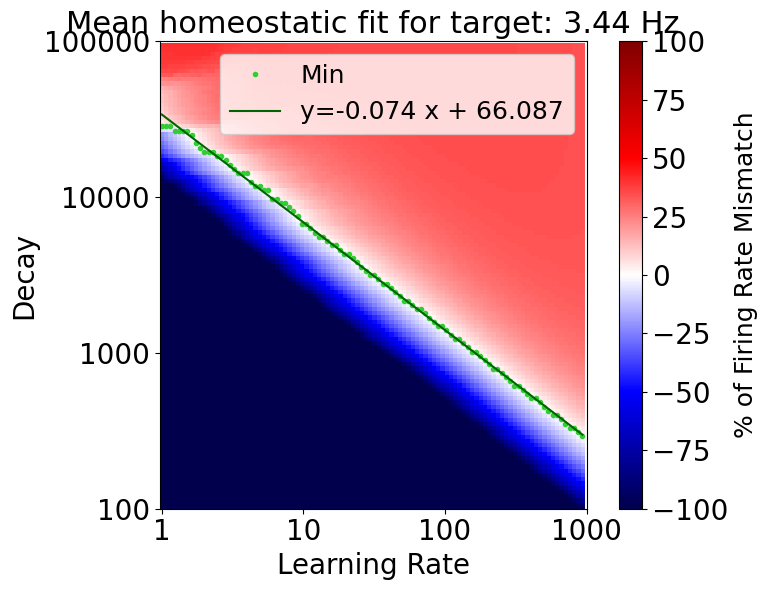

In [ ]:

# Font sizes
TITLE = 22
LABEL = 20
TICKS = 20
LEGEND = 18
COLORBAR = 18

# Plotting Average over G
figname = 'FIG_2_A'
fig = plt.figure(figsize=(8, 6))

o = 1
plt.imshow(100 * mean_hom_fit[o] / obj_rates[o], vmin=-100, vmax=100, cmap='seismic', 
            origin='lower', interpolation='none')
plt.plot(range(0, nlr), min_mm_pos[o], '.', label='Min', color='limegreen')
plt.plot(range(0, nlr), fit_res_2plot[o][0] * range(0, nlr) + fit_res_2plot[o][1], '-', 
            color='darkgreen',
            label='y=' + "{:.3f}".format(fit_res[o][0]) + ' x + ' + "{:.3f}".format(fit_res[o][1]))        

plt.xticks(ticks=np.linspace(0, nlr, 4), labels=lr_labels, fontsize=TICKS)
plt.xlabel('Learning Rate', fontsize=LABEL)
plt.title('Mean homeostatic fit for target: ' + str(obj_rates[o]) + ' Hz', fontsize=TITLE)
plt.ylim([0, ndec])
plt.legend(fontsize=LEGEND)


plt.yticks(ticks=np.linspace(0, ndec, 4), labels=dec_labels, fontsize=TICKS)   
plt.ylabel('Decay', fontsize=LABEL)


plt.tight_layout(rect=[0, 0, 0.9, 1])  # Adjust layout to make space for the colorbar

# Colorbar
#cbar_ax = fig.add_axes([0.92, 0.31, 0.02, 0.38])  # Adjust position and size of the colorbar
#cbar = plt.colorbar(cax=cbar_ax)
cbar = plt.colorbar()
cbar.set_label('% of Firing Rate Mismatch', fontsize=COLORBAR)
cbar.ax.tick_params(labelsize=TICKS)  # Colorbar ticks fontsize

plt.show()

# Save the figure
fig.savefig(figfold + figname + '.png', dpi=300, bbox_inches='tight')
fig.savefig(figfold + figname + '.svg', dpi=300, bbox_inches='tight')


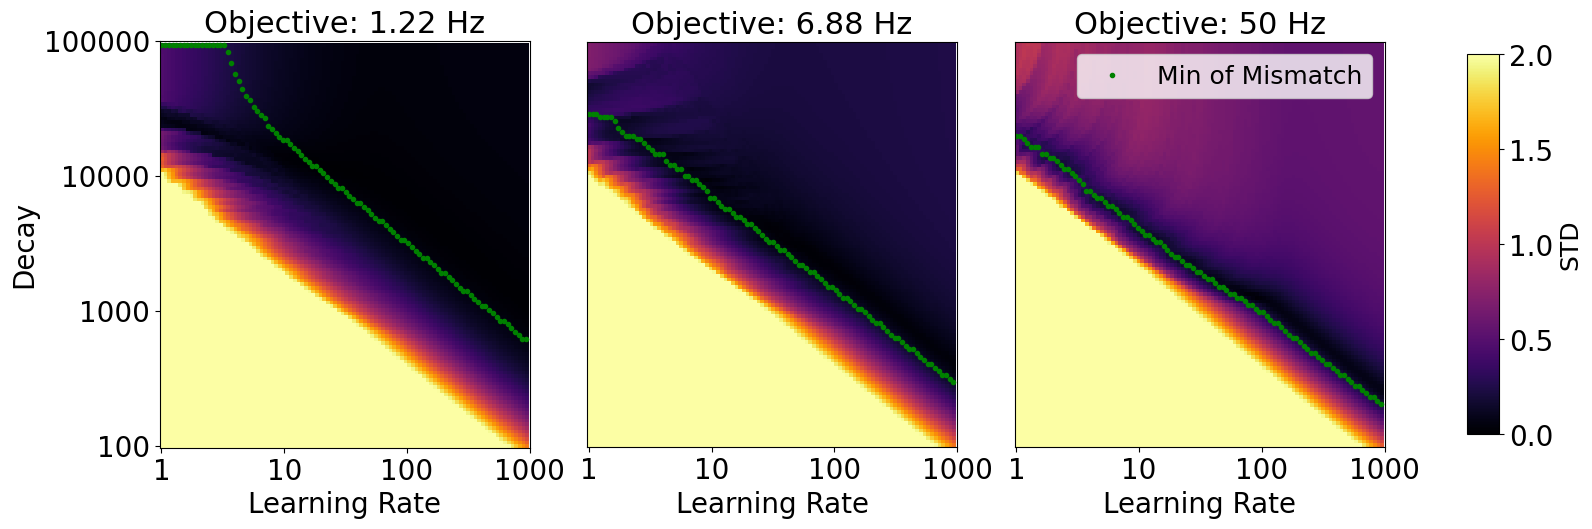

In [ ]:
# Plotting STD

# Font sizes
TITLE = 22
LABEL = 20
TICKS = 20
LEGEND = 18
COLORBAR = 18
figname = 'SUPP_FIG_2_B'
fig = plt.figure(figsize=(16, 10))
for o in range(nobjs):
    # STD over G
    ax = plt.subplot(1, nobjs, o + 1)
    im = plt.imshow(std_hom_fit[o], vmin=0, vmax=2, cmap='inferno', origin='lower', interpolation='none')
    plt.plot(range(0, nlr), min_mm_pos[o], 'g.', label='Min of Mismatch')
    
    plt.xticks(ticks=np.linspace(0, nlr, 4), labels=lr_labels, fontsize=TICKS)
    plt.xlabel('Learning Rate', fontsize=LABEL)
    plt.title('Objective: ' + str(obj_rates[o]) + ' Hz', fontsize=TITLE)
    
    if o == 0:
        plt.yticks(ticks=np.linspace(0, ndec, 4), labels=dec_labels, fontsize=TICKS)
        plt.ylabel('Decay', fontsize=LABEL)
    else:
        plt.yticks(ticks=[])

plt.legend(fontsize=LEGEND)
plt.tight_layout(rect=[0, 0, 0.9, 1])  # Adjust layout to make space for the colorbar

# Colorbar
cbar_ax2 = fig.add_axes([0.92, 0.31, 0.02, 0.38])  # Adjust position and size of the colorbar
cbar2 = plt.colorbar(im, cax=cbar_ax2)
cbar2.set_label('STD', fontsize=COLORBAR)
cbar2.ax.tick_params(labelsize=TICKS)  # Adjust colorbar tick font size

plt.show()

# Save the figure
fig.savefig(figfold + figname + '.png', dpi=300, bbox_inches='tight')
fig.savefig(figfold + figname + '.svg', dpi=300, bbox_inches='tight')


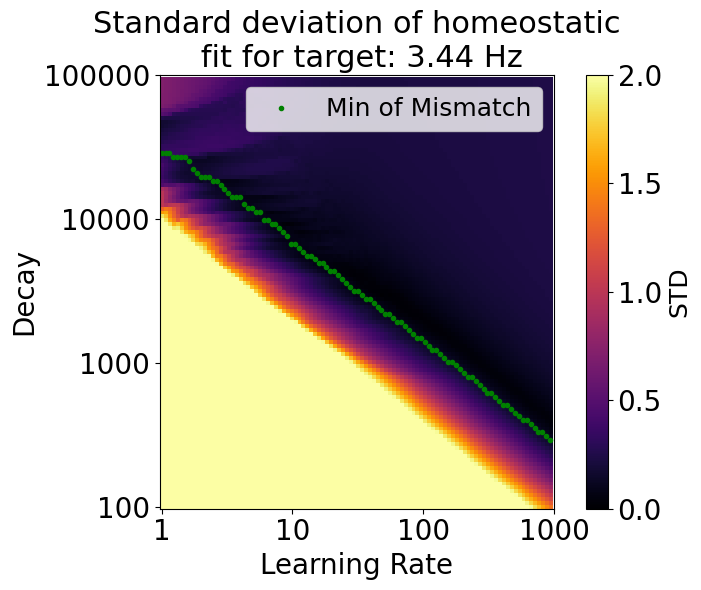

In [31]:
# Plotting STD

# Font sizes
TITLE = 22
LABEL = 20
TICKS = 20
LEGEND = 18
COLORBAR = 18

# Plotting Average over G
figname = 'FIG_2_B'
fig = plt.figure(figsize=(8, 6))
o = 1
# STD over G
im = plt.imshow(std_hom_fit[o], vmin=0, vmax=2, cmap='inferno', origin='lower', interpolation='none')
plt.plot(range(0, nlr), min_mm_pos[o], 'g.', label='Min of Mismatch')

plt.xticks(ticks=np.linspace(0, nlr, 4), labels=lr_labels, fontsize=TICKS)
plt.xlabel('Learning Rate', fontsize=LABEL)
plt.title('Standard deviation of homeostatic\n fit for target: ' + str(obj_rates[o]) + ' Hz', fontsize=TITLE)


plt.yticks(ticks=np.linspace(0, ndec, 4), labels=dec_labels, fontsize=TICKS)
plt.ylabel('Decay', fontsize=LABEL)

plt.legend(fontsize=LEGEND)
plt.tight_layout(rect=[0, 0, 0.9, 1])  # Adjust layout to make space for the colorbar

# Colorbar
#cbar_ax2 = fig.add_axes([0.92, 0.31, 0.02, 0.38])  # Adjust position and size of the colorbar
#cbar2 = plt.colorbar(im, cax=cbar_ax2)
cbar2 = plt.colorbar()
cbar2.set_label('STD', fontsize=COLORBAR)
cbar2.ax.tick_params(labelsize=TICKS)  # Adjust colorbar tick font size

plt.show()

# Save the figure
fig.savefig(figfold + figname + '.png', dpi=300, bbox_inches='tight')
fig.savefig(figfold + figname + '.svg', dpi=300, bbox_inches='tight')


In [3]:
import matplotlib.pyplot as plt
import numpy as np

LABEL = 18
LEGEND =18
TICKS= 20
TITLE = 24

sns.set_style("darkgrid")

# Define the data path
data_path = "/home/ivan.mindlin/Desktop/DatosParaRuben/ChequeoPreliminar"

# Load the results from the specified directory
dyn_fic_reps = np.load(os.path.join(data_path, "dyn_fic_reps.npy"))
stat_fic_reps = np.load(os.path.join(data_path, "stat_fic_reps.npy"))
stat_fic_reps = stat_fic_reps.reshape((dyn_fic_reps.shape), order='F').astype(np.float32)

avg_fr_dyn_values = np.load(os.path.join(data_path, "avg_fr_dyn_reps.npy"))
avg_fr_stat_values = np.load(os.path.join(data_path, "avg_fr_stat_reps.npy"))
avg_fr_mixed_values = np.load(os.path.join(data_path, "avg_fr_mix_reps.npy"))
G_values = np.load(os.path.join(data_path, "G_values.npy"))

In [4]:
from scipy.stats import pearsonr
# Calculate the correlation between the repetitions of dynamic and static FIC
corr_values = np.zeros((len(G_values),dyn_fic_reps.shape[1]))
for i in range(len(G_values)):
    for j in range(dyn_fic_reps.shape[1]):
        corr_values[i,j] = pearsonr(dyn_fic_reps[i, j, :], stat_fic_reps[i, j, :])[0]
# Calculate the mean and standard deviation of the correlation values
mean_corr_values = np.mean(corr_values, axis=1)
std_corr_values = np.std(corr_values, axis=1)
# Calcualte the MSE between the repetitions of dynamic and static FIC
mse_values = np.zeros((len(G_values),dyn_fic_reps.shape[1]))
for i in range(len(G_values)):
    for j in range(dyn_fic_reps.shape[1]):
        mse_values[i,j] = np.mean((dyn_fic_reps[i, j, :] - stat_fic_reps[i, j, :])**2)
# Calculate the mean and standard deviation of the MSE values
mean_mse_values = np.mean(mse_values, axis=1)
std_mse_values = np.std(mse_values, axis=1)

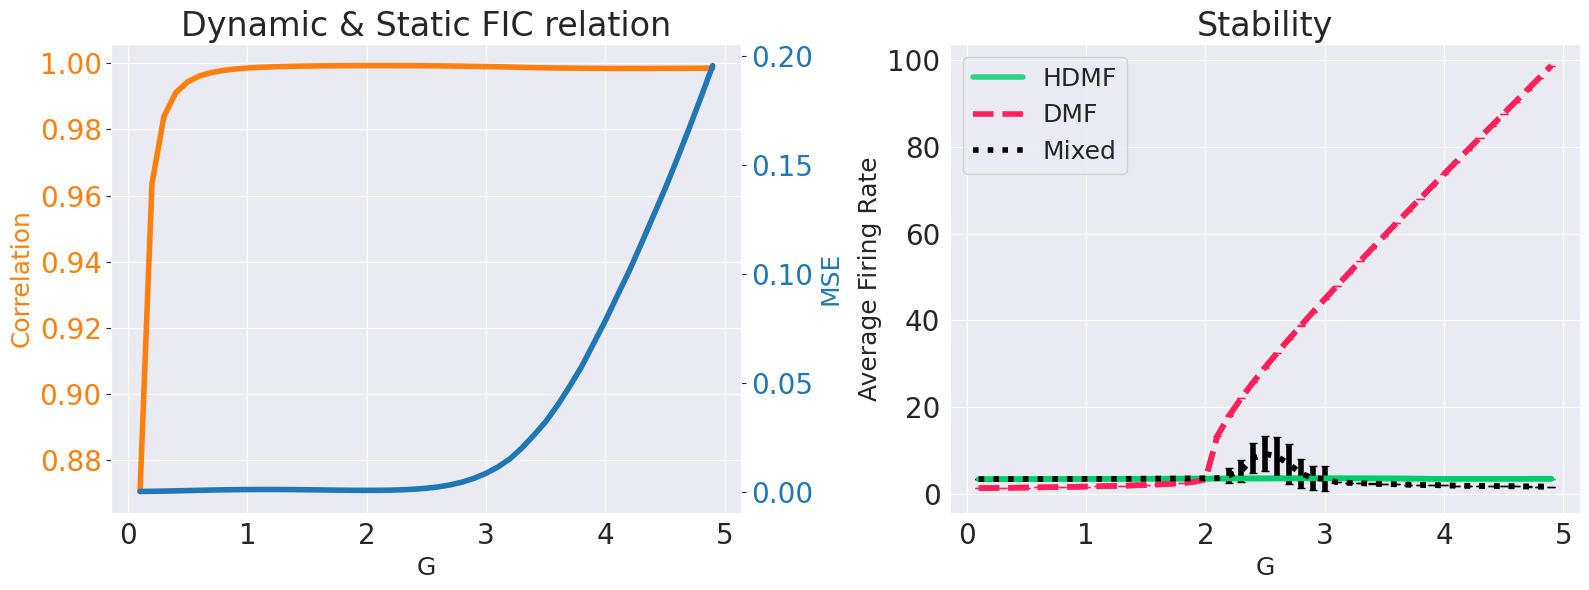

In [6]:


# Create a figure with 2 subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
with sns.axes_style("darkgrid"):
    # Subplot 1: Shared y-axis plot for Correlation and MSE
    ax1 = axes[0]
    color = 'tab:orange'
    ax1.set_xlabel('G', fontsize=LABEL)
    ax1.set_ylabel('Correlation', color=color, fontsize=LABEL)
    ax1.plot(G_values, mean_corr_values, color=color, label='Correlation', linewidth=4)
    ax1.tick_params(axis='y', labelcolor=color, labelsize=TICKS)
    ax1.tick_params(axis='x', labelsize=TICKS)
with sns.axes_style("dark"):
    # MSE (Right y-axis)
    ax2 = ax1.twinx()
    color = 'tab:blue'
    ax2.set_ylabel('MSE', color=color, fontsize=LABEL)
    ax2.plot(G_values, mean_mse_values, color=color, label='MSE',linewidth=4)
    ax2.tick_params(axis='y', labelcolor=color, labelsize=TICKS)

ax1.set_title('Dynamic & Static FIC relation', fontsize=TITLE)
with sns.axes_style("darkgrid"):
    # Subplot 2: Stability plot
    ax3 = axes[1]

    # Dynamic FIC: plot mean with shaded standard deviation
    mean_dyn = np.mean(avg_fr_dyn_values, axis=1)
    std_dyn = np.std(avg_fr_dyn_values, axis=1)       
    # Then plot the mean (thicker, with a legend entry)
    ax3.plot(G_values,
            mean_dyn,
            '-',
            color=category_colors['Dynamic'],
            linewidth=4,
            alpha=0.8,
            label='HDMF')
    ax3.errorbar(
        G_values,
        mean_dyn,
        yerr=std_dyn,
        fmt='-',
        color=category_colors['Dynamic'],
        linewidth=4,
        capsize=3,
        label='_nolegend_',
    )


    # Static FIC: plot mean with shaded standard deviation (dashed line)
    mean_stat = np.mean(avg_fr_stat_values, axis=1)
    std_stat = np.std(avg_fr_stat_values, axis=1)
    # Then plot the mean (thicker, with a legend entry)
    ax3.plot(G_values,
            mean_stat,
            '--',
            color=category_colors['Static'],
            linewidth=4,
            label='DMF')
    ax3.errorbar(
        G_values,
        mean_stat,
        yerr=std_stat,
        fmt='--',
        color=category_colors['Static'],
        linewidth=4,
        capsize=3,
        label='_nolegend_',
    )

    # Mixed values: plot each repetition with shaded error

    mix_rep = np.mean(avg_fr_mixed_values, axis=1)
    mix_std = np.std(avg_fr_mixed_values, axis=1)    

    ax3.plot(G_values,
            mix_rep,
            ':',
            color='black',
            linewidth=4,
            label='Mixed')
    ax3.errorbar(
            G_values,
            mix_rep,
            yerr=mix_std,
            fmt=':',
            color='black',
            linewidth=4,
            capsize=3,
            label='_nolegend_',
        )

    ax3.set_xlabel('G', fontsize=LABEL)
    ax3.set_ylabel('Average Firing Rate', fontsize=LABEL)
    ax3.tick_params(axis='x', labelsize=TICKS)
    ax3.tick_params(axis='y', labelsize=TICKS)
    ax3.set_title('Stability', fontsize=TITLE)
    handles, labels = ax3.get_legend_handles_labels()
    unique = dict(zip(labels, handles))
    ax3.legend(unique.values(), unique.keys(), fontsize=LEGEND)


# Adjust layout and save the figure
plt.tight_layout()
fig.savefig(figfold + 'FIG_2_C_D_combined.png', dpi=300)
fig.savefig(figfold + 'FIG_2_C_D_combined.svg', dpi=300)
plt.show()


# Fig 3

In [7]:
import fastdyn_fic_dmf as dmf

def compute_fcd(data, wsize, overlap, isubdiag, params):
    T, N = data.shape
    win_start = np.arange(0, T - params["wsize"] - 1, params["wsize"] - overlap)
    nwins = len(win_start)
    fcd = np.zeros((len(isubdiag[0]), nwins))
    for i in range(nwins):
        tmp = data[win_start[i]:win_start[i] + params["wsize"] + 1, :]
        cormat = np.corrcoef(tmp.T)
        fcd[:, i] = cormat[isubdiag[0], isubdiag[1]]
    return fcd

C = loadmat('./data/DTI_fiber_consensus_HCP.mat')['connectivity'][:200, :200]
C = 0.2 * C / np.max(C)
params = dmf.default_params(C=C)
params['N'] = C.shape[0]
isubfcd = np.triu_indices(C.shape[1], 1)
burnout = 7
params["wsize"] = 30
overlap = 29
params['TR'] = 0.72
T = 250
params['dtt'] = 0.001  # Assuming 'dtt' is defined; adjust as needed
nb_steps = int(T * params['TR'] / params['dtt'])
win_start = np.arange(0, T - burnout - params["wsize"], params["wsize"] - overlap)
nwins = len(win_start)
nints = len(isubfcd[0])

emp_data = mat73.loadmat('data/BOLD_timeseries_Awake.mat')
emp_data = np.squeeze(np.array(emp_data['BOLD_timeseries_Awake']))[:,:200,:]
emp_data = emp_data[:,:,burnout:]


emp_fcds = []
for sub in range(emp_data.shape[0]):
    fcds = compute_fcd(emp_data[sub, :, :].T, params["wsize"], overlap, isubfcd, params)
    upp_tr_fcd = np.corrcoef(fcds.T)[np.triu_indices(nwins-1, 1)]
    emp_fcds.append(upp_tr_fcd)

emp_fc = np.mean(np.array([np.corrcoef(emp_data[sub, :, :]) for sub in range(emp_data.shape[0])]), axis=0)
# remove the diagonal
emp_fc = emp_fc - np.eye(emp_fc.shape[0])

emp_fcd = np.hstack((emp_fcds))

In [8]:
# load ~/Desktop/DatosParaRuben/FittedSimulations/fcs_grid.npy

fcs_grid = np.load('/home/ivan.mindlin/Desktop/DatosParaRuben/FittedSimulations_TR2/fcs_grid.npy')
fcds_grid = np.load('/home/ivan.mindlin/Desktop/DatosParaRuben/FittedSimulations_TR2/fcds_grid.npy')

In [9]:
# ------------------------------------------------------------------
# PRE‑COMPUTED GRIDS
#   fcs_grid  : (2, nRep, N, N)
#   fcds_grid : (2, nRep, nWins, nWins)        # square, NOT flattened
# ------------------------------------------------------------------

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import ks_2samp

triu_fc  = np.triu_indices(fcs_grid.shape[2], k=1)
n_rep    = fcs_grid.shape[1]

rep_corr = np.zeros((2, n_rep))
mean_mse_values = np.zeros((2, n_rep))  # MSE values for each repetition
rep_ks   = np.zeros((2, n_rep))

sim_fcd_stat_vals = []        # 1‑D vectors collected here
sim_fcd_dyn_vals  = []

for m, label in enumerate(("Static", "Dynamic")):          # m = 0/1
    for r in range(n_rep):
        # ---------- FC correlation ----------
        sim_fc      = fcs_grid[m, r]
        rep_corr[m, r] = pearsonr(sim_fc[triu_fc], emp_fc[triu_fc])[0]
        # ---------- MSE ----------
        sim_fc_mat  = fcs_grid[m, r]          # square (N × N)
        sim_fc_vals = sim_fc_mat[triu_fc]
        emp_fc_vals = emp_fc[triu_fc]
        # Two‑sample MSE against the empirical pool
        mean_mse = np.mean((sim_fc_vals - emp_fc_vals) ** 2)
        mean_mse_values[m, r] = mean_mse

        # ---------- FCD distribution ----------
        sim_fcd_mat = fcds_grid[m, r]          # square (nWins × nWins)
        triu_FCD    = np.triu_indices(sim_fcd_mat.shape[0]-1, k=1)
        sim_fcd_vals = sim_fcd_mat[triu_FCD]

        # Two‑sample KS distance against the empirical pool
        rep_ks[m, r] = ks_2samp(sim_fcd_vals, emp_fcd)[0]

        # Collect for the histogram (ONE flat vector!)
        if m == 0:
            sim_fcd_stat_vals.append(sim_fcd_vals)
        else:
            sim_fcd_dyn_vals.append(sim_fcd_vals)

# concatenate across repetitions so seaborn sees three 1‑D vectors
sim_fcd_stat = np.hstack(sim_fcd_stat_vals)
sim_fcd_dyn  = np.hstack(sim_fcd_dyn_vals)

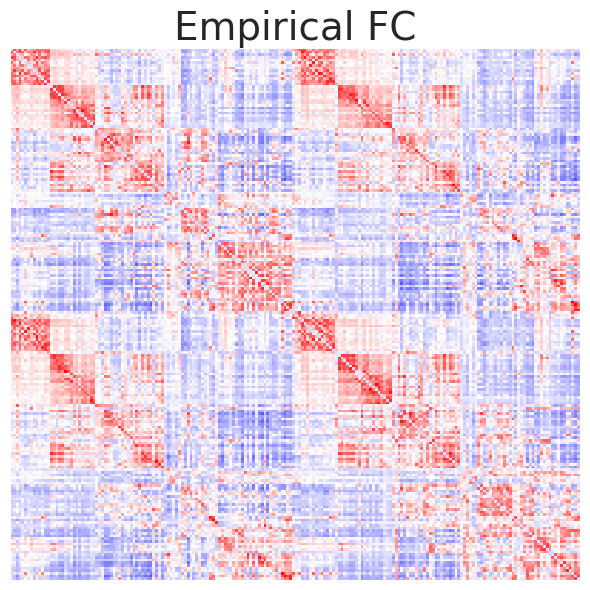

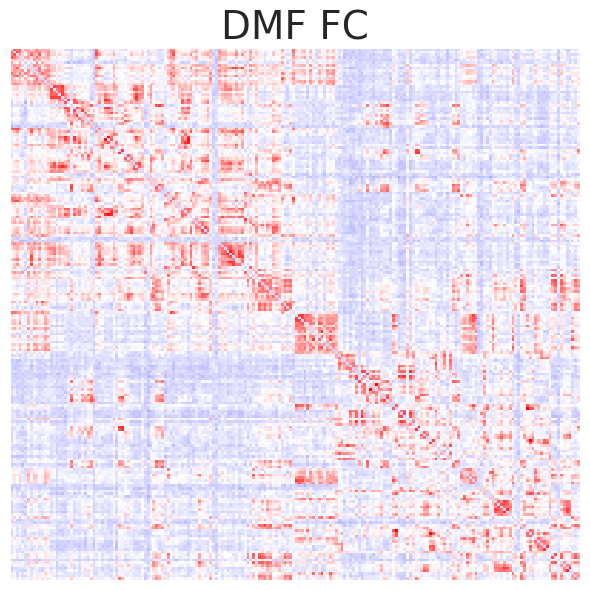

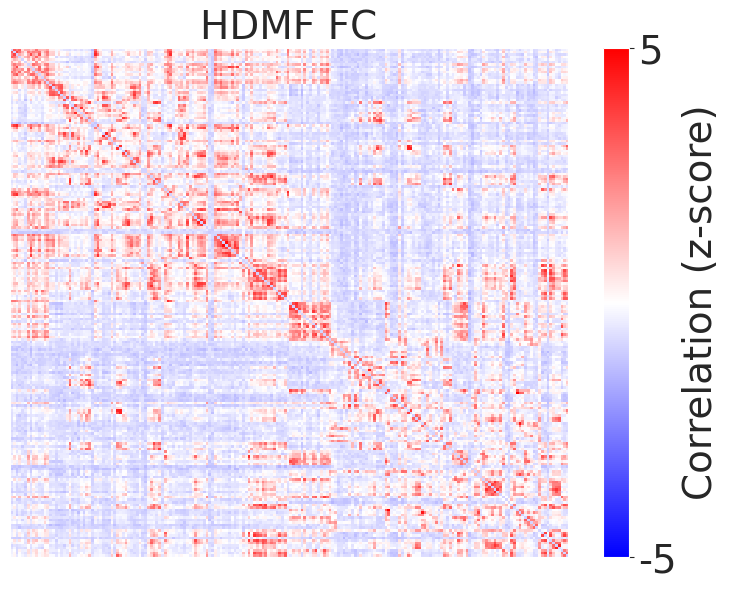

In [10]:
	
# Font sizes
from tkinter import font


TITLE = 28
LABEL = 18
TICKS = 18
COLORBAR = 18
LEGEND = 18


# Parameters
figname_base = 'FIG_3_'

fc_color_palette = 'bwr' #sns.diverging_palette(145, 300, s=60, as_cmap=True)
# Plot A: Empirical FC
fig_a = plt.figure(figsize=(6, 6))
# put 0 on the diagonal

# z-score the fc excluding the diagonal
emp_fc = (emp_fc - np.mean(emp_fc[triu_fc])) / np.std(emp_fc[triu_fc])
lim= np.max(np.abs(emp_fc))
plt.imshow(emp_fc, interpolation='none', aspect='auto', cmap=fc_color_palette, vmin=-lim, vmax=lim)


plt.title('Empirical FC', fontsize=TITLE)
plt.xticks([])  # Remove x-tick labels
plt.yticks([])  # Remove y-tick labels
plt.tight_layout()
fig_a.savefig(figfold + figname_base + 'A.png', dpi=300)
fig_a.savefig(figfold + figname_base + 'A.svg', dpi=300)
plt.show()

# Plot B: DMF FC
fig_b = plt.figure(figsize=(6, 6))
ave_static_fc = np.mean(fcs_grid[0, :16, :, :], axis=0)
# remove the diagonal
ave_static_fc = ave_static_fc - np.eye(ave_static_fc.shape[0])
# z-score the fc excluding the diagonal
ave_static_fc = (ave_static_fc - np.mean(ave_static_fc[triu_fc])) / np.std(ave_static_fc[triu_fc])
lim = np.max(np.abs(ave_static_fc))
plt.imshow(ave_static_fc, interpolation='none', aspect='auto', cmap=fc_color_palette, vmin=-lim, vmax=lim)
plt.title('DMF FC', fontsize=TITLE)
plt.xticks([])  # Remove x-tick labels
plt.yticks([])  # Remove y-tick labels
plt.tight_layout()
fig_b.savefig(figfold + figname_base + 'B.png', dpi=300)
fig_b.savefig(figfold + figname_base + 'B.svg', dpi=300)
plt.show()

# Plot C: HDMF FC
fig_c = plt.figure(figsize=(7.55, 6))
ave_dynamic_fc = np.mean(fcs_grid[1, :16, :, :], axis=0)
ave_dynamic_fc = ave_dynamic_fc - np.eye(ave_dynamic_fc.shape[0]) 
# z-score the fc excluding the diagonal
ave_dynamic_fc = (ave_dynamic_fc - np.mean(ave_dynamic_fc[triu_fc])) / np.std(ave_dynamic_fc[triu_fc])
lim = np.max(np.abs(ave_dynamic_fc))
h = plt.imshow(ave_dynamic_fc, interpolation='none', aspect='auto', cmap=fc_color_palette, vmin=-lim, vmax=lim)
cbar = plt.colorbar(h)
# Put -1 and 1 in the colorbar
cbar.set_ticks([-lim, lim])
cbar.set_ticklabels(['-5', '5'], fontsize=TITLE)
cbar.set_label('Correlation (z-score)', fontsize=TITLE)
plt.title('HDMF FC', fontsize=TITLE)
plt.xticks([])  # Remove x-tick labels
plt.yticks([])  # Remove y-tick labels
plt.tight_layout()
#fig_c.savefig(figfold + figname_base + 'C.png', dpi=300)
#fig_c.savefig(figfold + figname_base + 'C.svg', dpi=300)
plt.show()

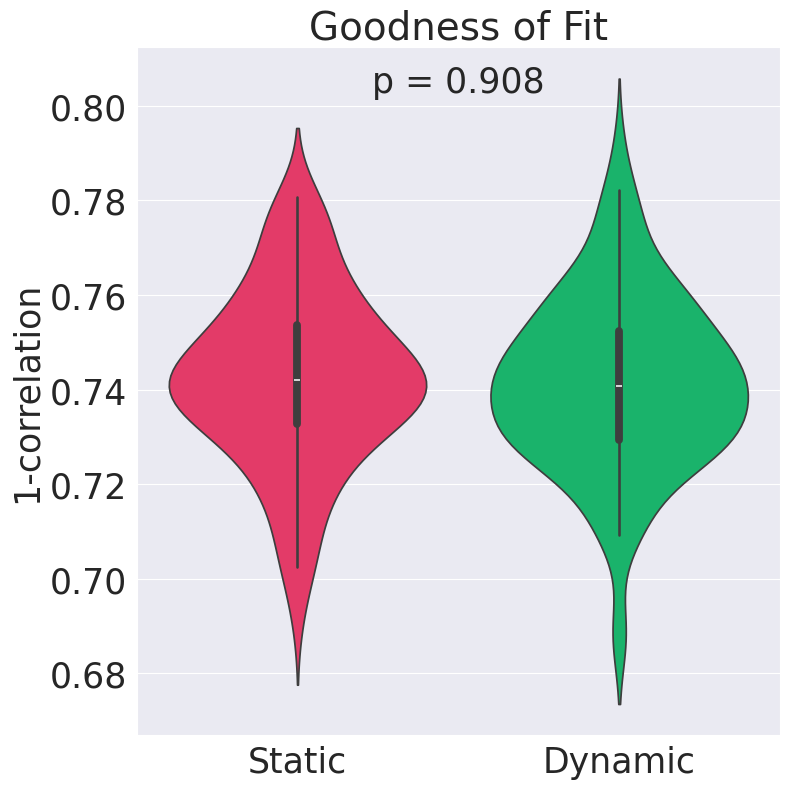

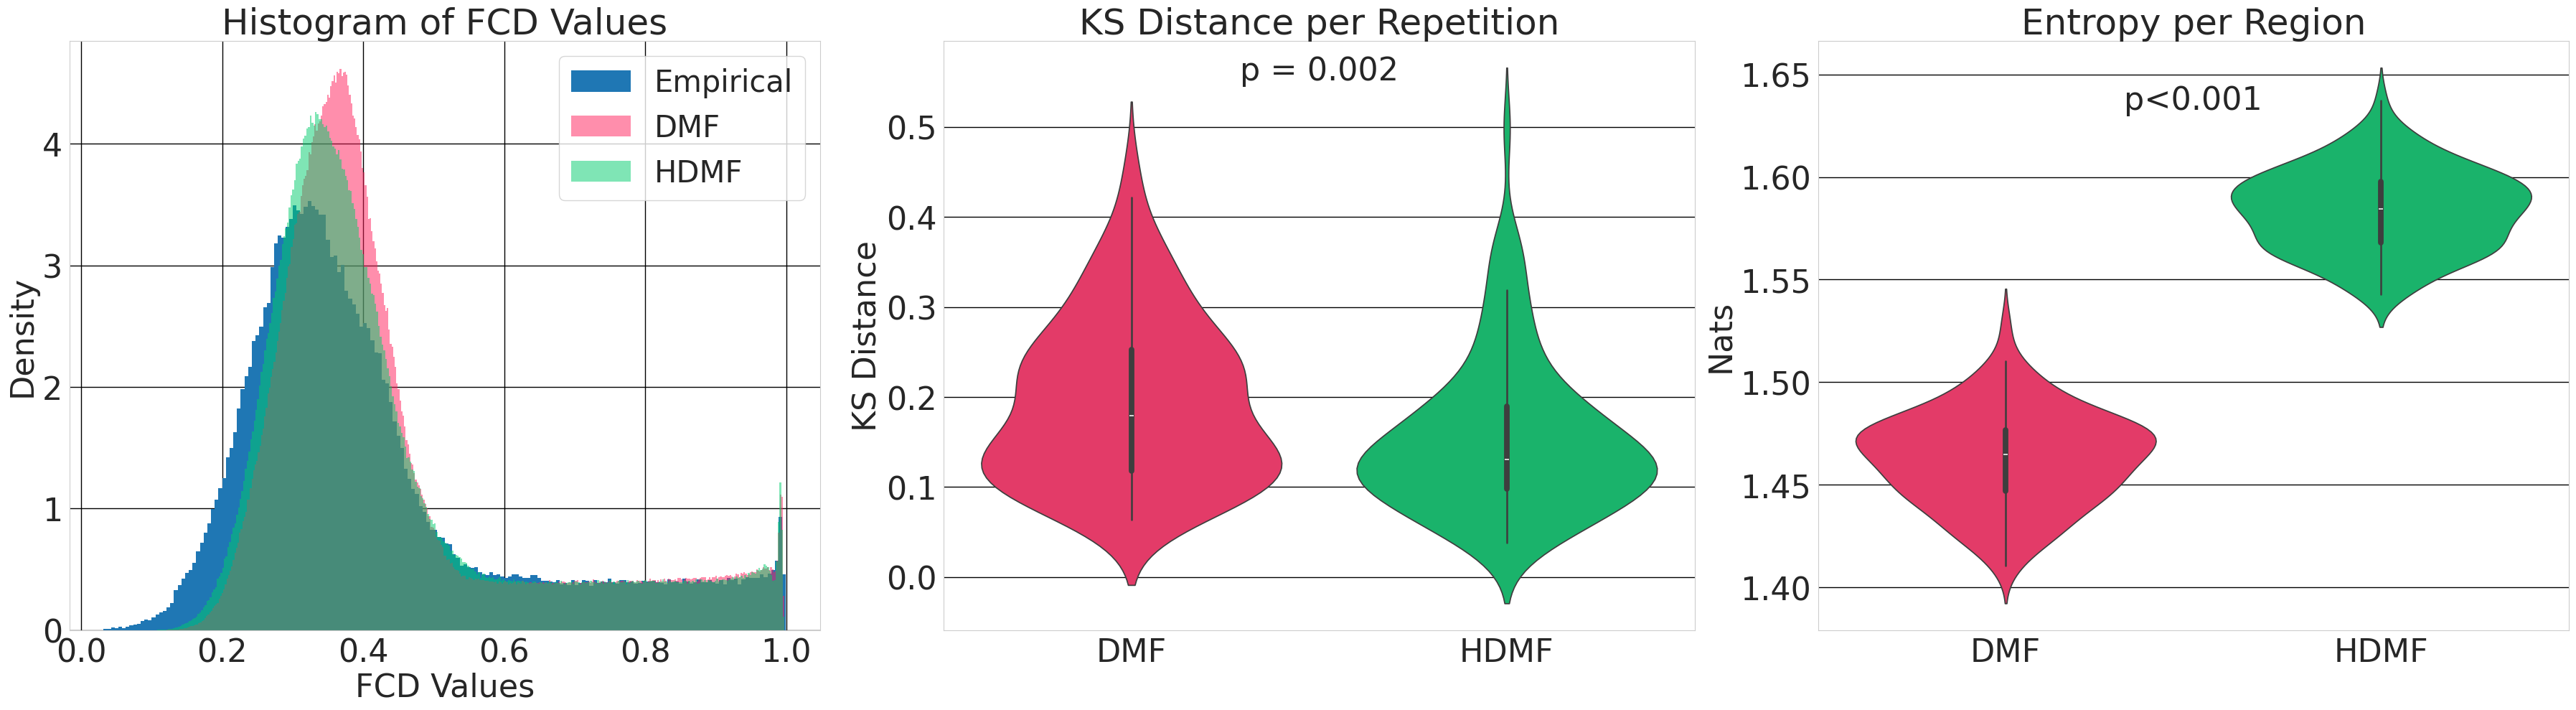

In [ ]:
from curses import color_pair
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ks_2samp
import numpy as np

# Font sizes
TITLE = 36
LABEL = 32
TICKS = 32
LEGEND = 30

sns.set_style("darkgrid")
static_color = category_colors['Static']
dynamic_color = category_colors['Dynamic']

# Compute goodness‐of‐fit
gof = 1 - rep_corr.T  # shape=(repetitions,2)

# Make 2×2 axes
fig, axes = plt.subplots(2, 2, figsize=(24, 20))
ax00, ax01 = axes[0]
ax10, ax11 = axes[1]

# (0,0) Goodness‐of‐Fit Violin
sns.violinplot(data=gof, palette=[static_color, dynamic_color], ax=ax00)
ax00.set_xticks([0, 1])
ax00.set_xticklabels(['DMF', 'HDMF'], fontsize=TICKS)
ax00.set_ylabel('1–correlation', fontsize=LABEL)
# set the size of the y-ticks
ax00.tick_params(labelsize=TICKS)
ax00.set_title('Goodness of Fit', fontsize=TITLE)
stat_d, p_d = ks_2samp(gof[:, 0], gof[:, 1])
if p_d < 0.001:
    ann = '***'
elif p_d < 0.01:
    ann = '**'
elif p_d < 0.05:
    ann = '*'
else:
    ann = f"p = {p_d:.3f}"
ax00.text(0.5, 0.95, ann, ha='center', va='center',
          transform=ax00.transAxes, fontsize=LABEL)

col_pal = sns.color_palette("tab10", 10)
# (0,1) Histogram of FCD
sns.histplot(emp_fcd, stat='density', color=col_pal[0], alpha=1, linewidth=0, ax=ax01, label='Empirical')
sns.histplot(sim_fcd_stat, stat='density', color=static_color, alpha=0.5, linewidth=0, ax=ax01, label='DMF')
sns.histplot(sim_fcd_dyn, stat='density', color=dynamic_color, alpha=0.5, linewidth=0, ax=ax01, label='HDMF')
ax01.set_xlabel('FCD Values', fontsize=LABEL)
ax01.set_ylabel('Density', fontsize=LABEL)
ax01.set_title('Histogram of FCD Values', fontsize=TITLE)
ax01.tick_params(labelsize=TICKS)
ax01.legend(fontsize=LEGEND)

# (1,0) Violin of KS‐distances per repetition
sns.violinplot(data=rep_ks.T, palette=[static_color, dynamic_color], ax=ax10)
ax10.set_xticks([0, 1])
ax10.set_xticklabels(['DMF', 'HDMF'], fontsize=TICKS)
ax10.set_ylabel('KS Distance', fontsize=LABEL)
ax10.tick_params(labelsize=TICKS)
ax10.set_title('KS Distance per Repetition', fontsize=TITLE)
stat_k, p_k = ks_2samp(rep_ks[0], rep_ks[1])
ax10.text(0.5, 0.95, f"p = {p_k:.3f}", ha='center', va='center',
           transform=ax10.transAxes, fontsize=LABEL)

# (1,1) Entropy per region
ent_stat = np.mean(np.load(datafolder+'FittedSimulations/stat_entropy.npy'), axis=1)
ent_dyn  = np.mean(np.load(datafolder+'FittedSimulations/dyn_entropy.npy'), axis=1)
#sns.stripplot(data=[ent_stat, ent_dyn], jitter=True, color='k', alpha=0.5, ax=ax11)
sns.violinplot(data=[ent_stat, ent_dyn], palette=[static_color, dynamic_color], ax=ax11)
ax11.set_xticks([0, 1])
ax11.set_xticklabels(['DMF', 'HDMF'], fontsize=TICKS)
ax11.set_ylabel('Nats', fontsize=LABEL)
ax11.tick_params(labelsize=TICKS)
ax11.set_title('Entropy per Region', fontsize=TITLE)
_, p_e = ks_2samp(ent_stat, ent_dyn)
if p_e < 0.001:
    ax11.text(0.5, 0.9, 'p<0.001', ha='center', va='center',
               transform=ax11.transAxes, fontsize=LABEL)

plt.tight_layout()
fig.savefig(figfold + figname_base + '2x2.png', dpi=300)
fig.savefig(figfold + figname_base + '2x2.svg', dpi=300)
plt.show()


In [ ]:
figfold + figname 

'/home/ivan.mindlin/Desktop/DatosParaRuben/Figuras/panelsFIG_3_'

In [39]:
# Statistcal tests between distributions
from scipy.stats import wilcoxon
ks, p_fcd = ks_2samp(rep_ks[0,:],rep_ks[1,:])
ks_corr, p_fc = ks_2samp(rep_corr[0,:],rep_corr[1,:])

_, w_p_fcd= wilcoxon(rep_ks[0,:],rep_ks[1,:])
_, w_p_fc= wilcoxon(rep_corr[0,:],rep_corr[1,:])
[p_fcd, p_fc, w_p_fcd,w_p_fc]

# Cohen's d for FCD ks values
from scipy.stats import ttest_ind
from statsmodels.stats.weightstats import DescrStatsW
def cohen_d(x, y):
    """Calculate Cohen's d for two independent samples."""
    nx = len(x)
    ny = len(y)
    dof = nx + ny - 2
    mean_diff = np.mean(x) - np.mean(y)
    pooled_std = np.sqrt(((nx - 1) * np.std(x, ddof=1) ** 2 + (ny - 1) * np.std(y, ddof=1) ** 2) / dof)
    return mean_diff / pooled_std
# For the FCD values
cohen_d_fcd = cohen_d(rep_ks[0,:],rep_ks[1,:])
print(f"KS test p-value for FCD: {p_fcd}, Cohen's d: {cohen_d_fcd}")
# For the entropy values
cohen_d_entropy = cohen_d(ent_stat, ent_dyn)
print(f"KS test p-value for Entropy: {p_e}, Cohen's d: {cohen_d_entropy}")

KS test p-value for FCD: 0.002219935934558366, Cohen's d: 0.46238866908509807
KS test p-value for Entropy: 2.2087606931995054e-59, Cohen's d: -5.611343385313267


### PET image

#### Neuromodulation with and without plasticity rule

In [40]:

# Neuromodulation
nm_mean_fr = [] # 0 is static, 1 dynamic
nm_std_fr = [] # 0 is static, 1 dynamic
nm_fc = [] # 0 is static, 1 dynamic
nm_fcd = [] # 0 is static, 1 dynamic
nm_mean_fr.append(np.load(datafolder+'neuromod/static5HT2a/mean_fr_grid.npy'))
nm_mean_fr.append(np.load(datafolder+'neuromod/dynamic5HT2a/mean_fr_grid.npy'))
nm_mean_fr.append(np.load(datafolder+'neuromod/mixed5HT2a/mean_fr_grid.npy'))
nm_std_fr.append(np.load(datafolder+'neuromod/static5HT2a/std_fr_grid.npy'))
nm_std_fr.append(np.load(datafolder+'neuromod/dynamic5HT2a/std_fr_grid.npy'))
nm_std_fr.append(np.load(datafolder+'neuromod/mixed5HT2a/std_fr_grid.npy'))

In [41]:
## Computing the correlation between receptor density and firing rates for each learning rate
LR_range = np.logspace(0,2.46,10)
#RECEPTORS = np.load("./data/Schaeffer200-Tian/D2_fallypride_hc49_jaworska_schaeffer200.npy")[:200]
#RECEPTORS = np.load("./data/Schaeffer200-Tian/NMDA_ge179_hc29_galovic_schaeffer200.npy")[:200]
RECEPTORS = np.load("./data/Schaeffer200-Tian/5HT2a_cimbi_hc29_beliveau_schaeffer200.npy")[:200]

RECEPTORS = RECEPTORS/max(RECEPTORS)-min(RECEPTORS)
RECEPTORS = RECEPTORS - max(RECEPTORS) + 1
receptors = np.reshape(RECEPTORS, (RECEPTORS.shape[0],1))
nlrs = 10
polyfit_out_static = [np.polyfit(np.squeeze(receptors), nm_mean_fr[0][x].T, 1, full=True) for x in range(nlrs)]
polyfit_out_dyn = [np.polyfit(np.squeeze(receptors), nm_mean_fr[1][x].T, 1, full=True) for x in range(nlrs)]
polyfit_out_mixed = [np.polyfit(np.squeeze(receptors), nm_mean_fr[2][x].T, 1, full=True) for x in range(nlrs)]

corr_out_static = [1-cdist(receptors.T, nm_mean_fr[0][x],metric='correlation') for x in range(nlrs)]
corr_out_dyn = [1-cdist(receptors.T, nm_mean_fr[1][x],metric='correlation') for x in range(nlrs)]
corr_out_mixed = [1-cdist(receptors.T, nm_mean_fr[2][x],metric='correlation') for x in range(nlrs)]

slope_rec_fr = [np.vstack([x[0][0],y[0][0],(z[0][0])]) for x,y,z in zip(polyfit_out_static,polyfit_out_dyn,polyfit_out_mixed)]
res_rec_fr = [np.vstack([x[0][1],y[0][1],(z[0][1])]) for x,y,z in zip(polyfit_out_static,polyfit_out_dyn,polyfit_out_mixed)]
corr_rec_fr = [np.vstack([x,y,z]) for x,y,z in zip(corr_out_static,corr_out_dyn,corr_out_mixed)]



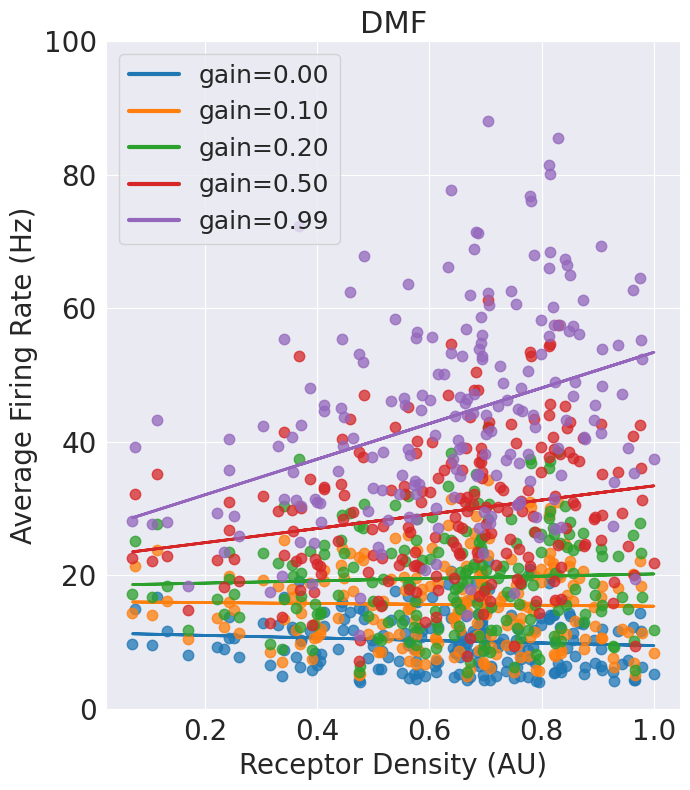

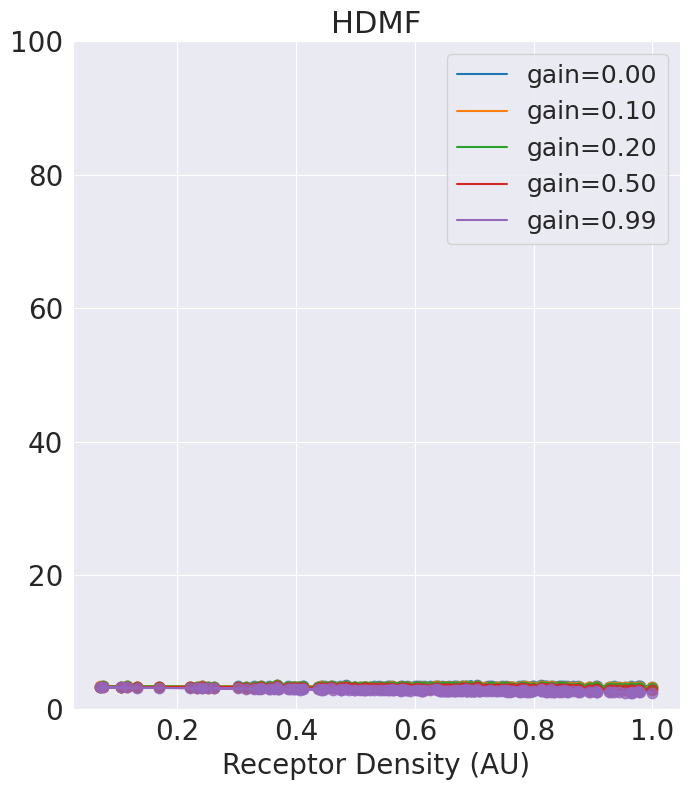

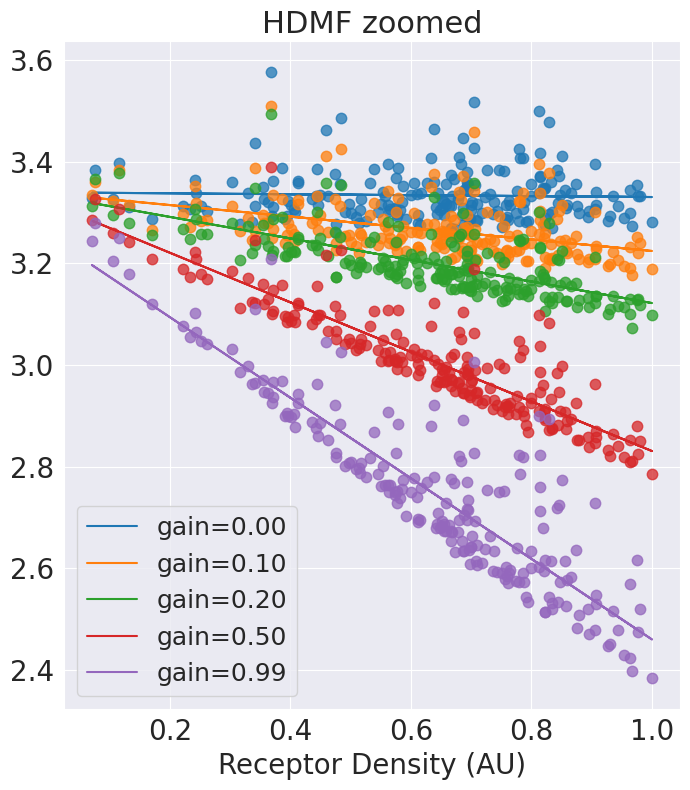

In [46]:

# Font sizes
TITLE = 22
LABEL = 20
TICKS = 20
LEGEND = 18
COLORBAR = 18
sns.set_style("darkgrid")
# Parameters
titles = ['DMF', 'HDMF','Mixed']
lr_vals = np.logspace(0, 2.46, 10)
alpha_vals = [0.15, 0.25, 0.35, 0.45, 0.55, 0.65, 0.75, 0.85, 0.95, 1.05]
receptors = RECEPTORS
gains2plot = [0, 10, 20, 50, 99]
nm_2_plot = [6, 8,5]  # Indices for DMF, HDMF, Mixed
figname = 'FIG_4'

# Figure 1: DMF
fig1 = plt.figure(figsize=(7, 8))
for g in gains2plot:
    # Scatter plot
    plot, = plt.plot(receptors,
                     nm_mean_fr[0][nm_2_plot[0], g, :],
                     '.',
                     markersize=15,
                     alpha=0.75)
    # Compute and plot the linear fit with thicker line
    coeffs = np.polyfit(np.squeeze(receptors),
                        nm_mean_fr[0][nm_2_plot[0], g, :],
                        1)
    linear_fit = np.poly1d(coeffs)
    plt.plot(receptors,
             linear_fit(receptors),
             '-',
             color=plot.get_color(),
             linewidth=2,          # make line thicker
             label=f'gain={g/100:.2f}')

plt.xlabel('Receptor Density (AU)', fontsize=LABEL)
plt.ylabel('Average Firing Rate (Hz)', fontsize=LABEL)
plt.title(titles[0], fontsize=TITLE)
plt.xticks(fontsize=TICKS)
plt.yticks(fontsize=TICKS)
plt.ylim([0, 100])

# Draw legend and thicken its lines
leg = plt.legend(fontsize=LEGEND)
for legline in leg.get_lines():
    legline.set_linewidth(3)

plt.tight_layout()
plt.show()

# Save FIG_3A
fig1.savefig(figfold + figname + '_DMF.svg', dpi=300)
fig1.savefig(figfold + figname + '_DMF.png', dpi=300)



# Figure 2: HDMF
fig2 = plt.figure(figsize=(7, 8))
for g in gains2plot:
    # Scatter plot
    plot, = plt.plot(receptors, nm_mean_fr[1][nm_2_plot[1], g, :], '.', markersize=15, alpha=0.75)
    
    # Compute and plot the linear fit
    coeffs = np.polyfit(np.squeeze(receptors), nm_mean_fr[1][nm_2_plot[1], g, :], 1)
    linear_fit = np.poly1d(coeffs)
    plt.plot(receptors, linear_fit(receptors), '-', color=plot.get_color(), 
             label=f'gain={g/100:.2f}')

plt.xlabel('Receptor Density (AU)', fontsize=LABEL)
plt.title(titles[1], fontsize=TITLE)
# Put the same range for both y-axes
plt.ylim([0, 100])
plt.xticks(fontsize=TICKS)
plt.yticks(fontsize=TICKS)
plt.legend(fontsize=LEGEND)
plt.tight_layout()
plt.show()

# Save FIG_3B
fig2.savefig(figfold + figname + '_HDMF.svg', dpi=300)
fig2.savefig(figfold + figname + '_HDMF.png', dpi=300)

# Figure 2: HDMF
fig3 = plt.figure(figsize=(7, 8))
for g in gains2plot:
    # Scatter plot
    plot, = plt.plot(receptors, nm_mean_fr[1][nm_2_plot[1], g, :], '.', markersize=15, alpha=0.75)
    
    # Compute and plot the linear fit
    coeffs = np.polyfit(np.squeeze(receptors), nm_mean_fr[1][nm_2_plot[1], g, :], 1)
    linear_fit = np.poly1d(coeffs)
    plt.plot(receptors, linear_fit(receptors), '-', color=plot.get_color(), 
             label=f'gain={g/100:.2f}')

plt.xlabel('Receptor Density (AU)', fontsize=LABEL)
plt.title(titles[1] + ' zoomed', fontsize=TITLE)
plt.xticks(fontsize=TICKS)
plt.yticks(fontsize=TICKS)
plt.legend(fontsize=LEGEND)
plt.tight_layout()
plt.show()

# Save FIG_3B
fig3.savefig(figfold + figname + '_HDMF_zoomed.svg', dpi=300)
fig3.savefig(figfold + figname + '_HDMF_zoomed.png', dpi=300)

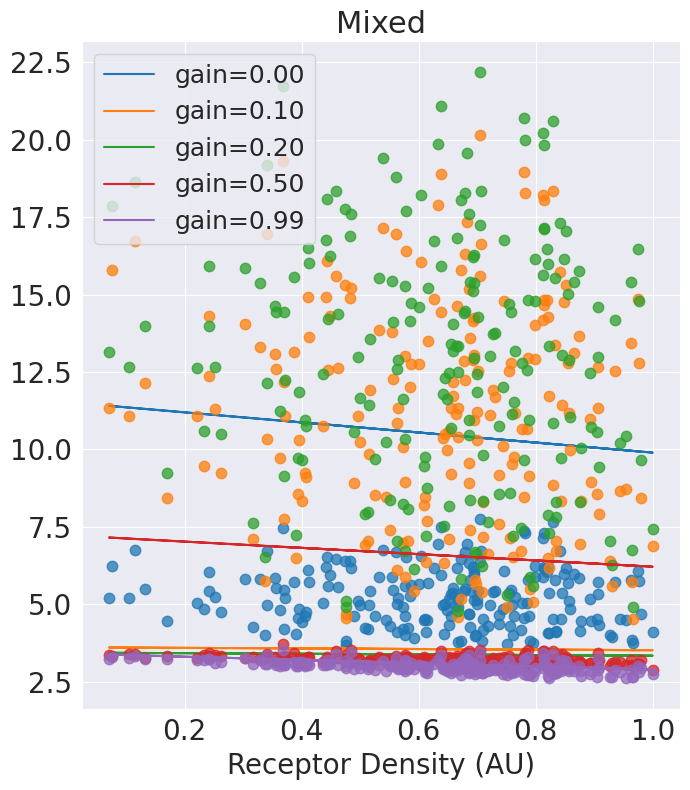

In [8]:


# Adding in the middle Mixed case
fig4 = plt.figure(figsize=(7, 8))
for g in gains2plot:
    # Scatter plot
    plot, = plt.plot(receptors, nm_mean_fr[2][3, g, :], '.', markersize=15, alpha=0.75)
    
    # Compute and plot the linear fit
    coeffs = np.polyfit(np.squeeze(receptors), nm_mean_fr[2][2, g, :], 1)
    linear_fit = np.poly1d(coeffs)
    plt.plot(receptors, linear_fit(receptors), '-', color=plot.get_color(), 
             label=f'gain={g/100:.2f}')

plt.xlabel('Receptor Density (AU)', fontsize=LABEL)
plt.title(titles[2], fontsize=TITLE)
# Put the same range for both y-axes

plt.xticks(fontsize=TICKS)
plt.yticks(fontsize=TICKS)
plt.legend(fontsize=LEGEND)
plt.tight_layout()
plt.show()

# Save FIG_3B
fig4.savefig(figfold + figname + '_Mixed.svg', dpi=300)
fig4.savefig(figfold + figname + '_Mixed.png', dpi=300)

<Figure size 1200x800 with 0 Axes>

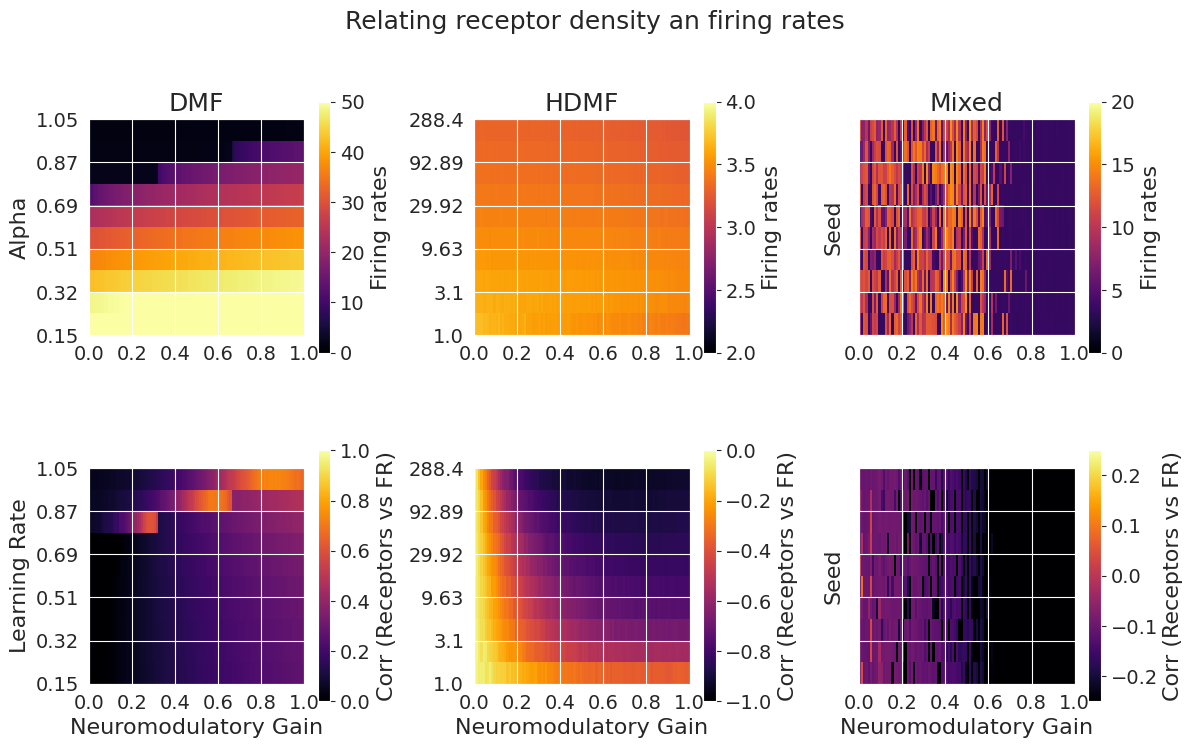

In [21]:
import matplotlib.pyplot as plt
import numpy as np

# Font sizes
TITLE = 18
LABEL = 16
TICKS = 14
COLORBAR = 16

# Parameters
figname = 'Supp_2_with_Mixed'

titles = ['DMF', 'HDMF','Mixed']
yticks = [np.floor(np.linspace(0.15, 1.05, 6) * 100) / 100, np.floor((np.logspace(0, 2.46, 6)) * 100) / 100,[]]
ylabel = ['Alpha', 'Learning Rate']


res_rec_fr_rs = np.dstack((res_rec_fr))
corr_rec_fr_rs = np.dstack((corr_rec_fr))

# Display ranges
fr_vmin = [0, 2,0]
fr_vmax = [50, 4,20]
c_vmin = [0, -1,-0.25]
c_vmax = [1, 0,0.25]

fig = plt.figure(figsize=(12, 8))
cont = 1
# Create a 2×3 grid of axes
fig, axes = plt.subplots(2, 3, figsize=(12, 8))
for p in range(3):
    # Top row: firing rates
    ax = axes[0, p]
    im1 = ax.imshow(res_rec_fr_rs[p].T, origin='lower',
                    vmin=fr_vmin[p], vmax=fr_vmax[p], cmap='inferno',
                    interpolation='none', extent=(0, 100, 0, 100))
    ax.set_title(titles[p], fontsize=TITLE)
    cbar1 = fig.colorbar(im1, ax=ax, shrink=0.7)
    cbar1.set_label('Firing rates', fontsize=COLORBAR)
    cbar1.ax.tick_params(labelsize=TICKS)
    ax.set_yticks(np.linspace(0, 100, 6))
    ax.set_yticklabels(yticks[p], fontsize=TICKS)
    if p==0:
        ax.set_ylabel(ylabel[0], fontsize=LABEL)
    elif p==2:
        ax.set_ylabel('Seed', fontsize=LABEL)
    else:
        ax.set_ylabel('')
    ax.set_xticks(np.linspace(0, 100, 6))
    ax.set_xticklabels(np.linspace(0, 100, 6) / 100, fontsize=TICKS)
    ax.set_xlabel('', fontsize=LABEL)



    # Bottom row: correlation
    ax = axes[1, p]
    im2 = ax.imshow(corr_rec_fr_rs[p].T, origin='lower',
                    vmin=c_vmin[p], vmax=c_vmax[p], cmap='inferno',
                    interpolation='none', extent=(0, 100, 0, 100))
    cbar2 = fig.colorbar(im2, ax=ax, shrink=0.7)
    cbar2.set_label('Corr (Receptors vs FR)', fontsize=COLORBAR)
    cbar2.ax.tick_params(labelsize=TICKS)
    ax.set_yticks(np.linspace(0, 100, 6))
    ax.set_yticklabels(yticks[p], fontsize=TICKS)
    if p==0:
        ax.set_ylabel(ylabel[1], fontsize=LABEL)
    elif p==2:
        ax.set_ylabel('Seed', fontsize=LABEL)
    else:
        ax.set_ylabel('')
    ax.set_xticks(np.linspace(0, 100, 6))
    ax.set_xticklabels(np.linspace(0, 100, 6) / 100, fontsize=TICKS)
    
    ax.set_xlabel('Neuromodulatory Gain', fontsize=LABEL)
    
fig.suptitle("Relating receptor density an firing rates", fontsize=TITLE)
plt.tight_layout()
fig.savefig(figfold + figname + '.png', dpi=300)
fig.savefig(figfold + figname + '.svg', dpi=300)
plt.show()


### III.- A potential mechanism for whole-brain slow-waves

In [19]:
e_rates_tseries = np.load(datafolder+'slow_waves/time_series_examples/rates_results.npy')
rates_tseries = np.load(datafolder+'slow_waves/time_series_examples/rates_inh_results.npy')
fic_tseries = np.load(datafolder+'slow_waves/time_series_examples/fic_t_results.npy')
gvals_tseries = np.load(datafolder+'slow_waves/time_series_examples/G_vals.npy')


In [23]:
from scipy.signal import find_peaks, correlate,welch


def get_peak_and_ms(rates):
    """Get the value of the first peak from the autocorrealtion of the average firing rates"""
    signal = np.mean(rates, axis=0)
    signal -= np.mean(signal)

    # Calculate autocorrelation function
    autocorr = np.correlate(signal, signal, mode='full')

    # Normalize the autocorrelation function
    autocorr = autocorr / np.var(signal) / len(signal)
    autocorr = autocorr[len(signal)-1:]
    peaks, _ = find_peaks(autocorr, height=(0.2,0.8), prominence=0.2)
    if peaks.size==0:
        autocorr_value = 0
        time = 0
    else:
        autocorr_value = autocorr[peaks[0]]
        time = peaks[0]
    return autocorr, autocorr_value, time

def cross_corr(x, y):
    """Get the value of the first peak from the autocorrealtion of the average firing rates"""
    signal = np.mean(rates, axis=0)
    signal -= np.mean(signal)

    # Calculate autocorrelation function
    autocorr = np.correlate(signal, signal, mode='full')

    # Normalize the autocorrelation function
    autocorr = autocorr / np.var(signal) / len(signal)
    autocorr = autocorr[len(signal)-1:]

    return crosscorr

def get_max_freq_and_power(rates):
    freqs, psd = welch(rates, fs=1000,axis=1,nperseg=4*1000,noverlap=2*1000)
    max_freq_id = np.argmax(psd[:,:100],axis=1)
    max_freqs = freqs[max_freq_id]
    max_power = np.max(psd[:,:100],axis=1)
    return max_freqs, max_power,freqs,psd

In [24]:
acorr = list()
acorr_peak = np.zeros((3))
acorr_time = np.zeros((3))
xcorr_rate_fic = list()
for d in range(3):
    aux_acorr, acorr_peak[d], acorr_time[d] = get_peak_and_ms(np.mean(e_rates_tseries[d,:,:],axis=0)[None,:])
    acorr.append(aux_acorr)
    # xcorr between fic and rates
    x=np.mean(e_rates_tseries[d,:,:],axis=0)
    x=(x-np.mean(x))/np.std(x)
    
    y=np.mean(fic_tseries[d,:,:],axis=0)
    y=(y-np.mean(y))/np.std(y)
    corr = correlate(x, y, mode='full')             
    xcorr_rate_fic.append(corr/len(x))    
    
acorrs = np.vstack((acorr))
np.shape(acorrs)    
    

(3, 10000)

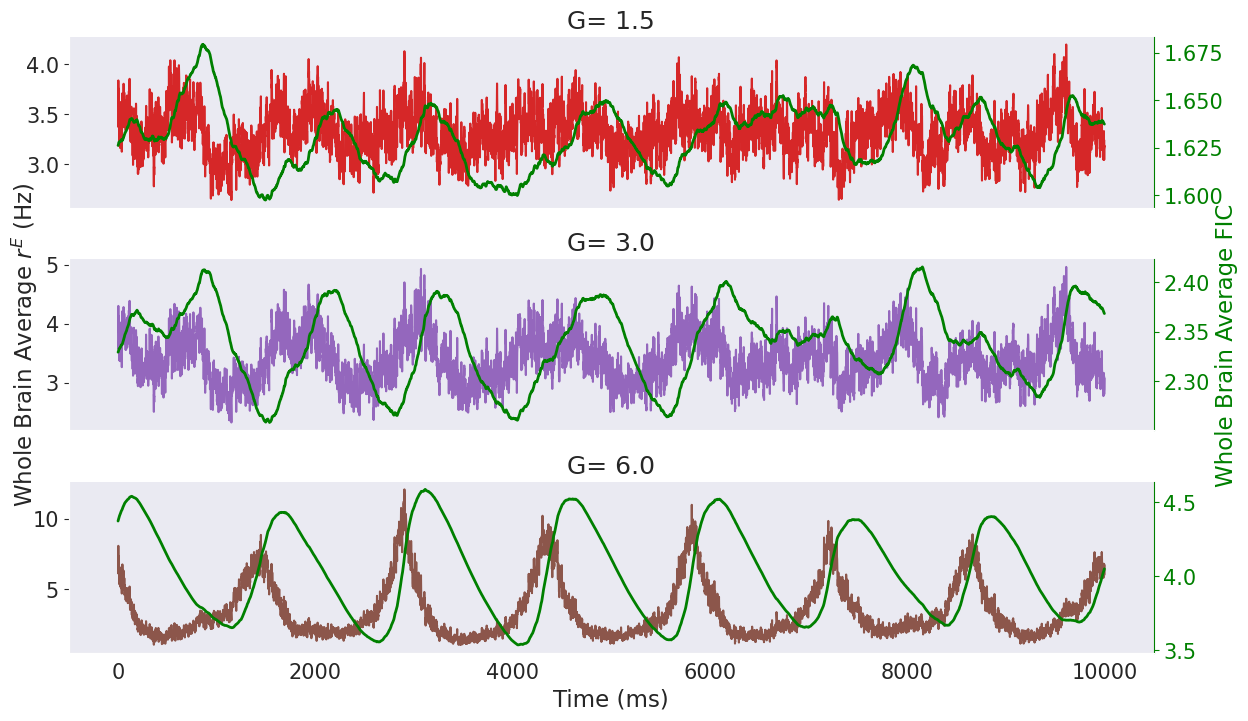

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Font sizes
TITLE = 18
LABEL = 16.5
TICKS = 15
LEGEND = 12

# Parameters
max_t = 10000
acor_tbase = np.arange(0, max_t)
figname = 'FIG_5'
sns.set_style("dark")
col_pal = sns.color_palette()

# Create the figure with improved spacing
fig, axes = plt.subplots(3, 1, figsize=(14, 8), gridspec_kw={'hspace': 0.3})

for e in range(3):
    ax = axes[e]
    ax.plot(acor_tbase, np.mean(e_rates_tseries[e, :, :max_t], axis=0), color=col_pal[3 + e])

    # Create a twin Axes for the right y-axis
    ax2 = ax.twinx()
    ax2.plot(acor_tbase, np.mean(fic_tseries[e, :, :max_t], axis=0), color='green', linewidth=2)

    # Labels and Titles
    if e==1:
        ax.set_ylabel(r'Whole Brain Average $r^E$ (Hz)', fontsize=LABEL)
        ax2.set_ylabel(r'Whole Brain Average FIC', fontsize=LABEL, color='green')

    ax.set_title(f'G= {gvals_tseries[e]}', fontsize=TITLE)

    # Customize the right y-axis ticks and line color
    ax2.yaxis.set_tick_params(color='green', labelcolor='green', labelsize=TICKS)
    ax2.spines['right'].set_color('green')

    # Hide x-axis ticks for the first two plots
    if e == 2:
        ax.set_xlabel('Time (ms)', fontsize=LABEL)
    else:
        ax.set_xticks([])

    # Axes properties
    ax.tick_params(axis='both', labelsize=TICKS)
    ax2.tick_params(axis='y', labelsize=TICKS)
    ax.spines['top'].set_visible(False)
    ax2.spines['top'].set_visible(False)
    ax.spines['bottom'].set_visible(e == 2)  # Bottom spine visible only for the last plot

#plt.tight_layout()

# Save the figure
fig.savefig(figfold + figname + '_A.png', dpi=300)
fig.savefig(figfold + figname + '_A.svg', dpi=300)
plt.show()


In [26]:

sns.set(style="darkgrid")

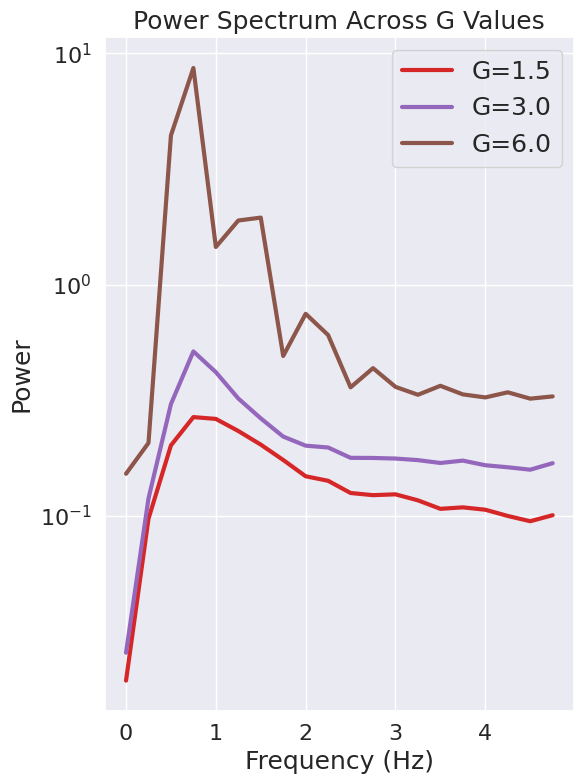

In [27]:
import matplotlib.pyplot as plt

# Font sizes
TITLE = 18
LABEL = 18
TICKS = 16
LEGEND = 18



# Parameters
figname = 'FIG_5_B'
sns.set_style("darkgrid")
# Create the figure
fig, ax = plt.subplots(figsize=(6, 8))

# Plot power spectra for different G values using semilogy
for i in range(3):
    freq, power, f, p = get_max_freq_and_power(e_rates_tseries[i])
    ax.semilogy(f[:20], (p[:, :20].T).mean(axis=1),
                label=f'G={gvals_tseries[i]}',
                color=col_pal[3 + i], linewidth=3)

# Labels, title, and ticks
ax.set_xlabel('Frequency (Hz)', fontsize=LABEL)
ax.set_ylabel('Power', fontsize=LABEL)
ax.set_title('Power Spectrum Across G Values', fontsize=TITLE)
ax.tick_params(axis='both', labelsize=TICKS)

# Add legend
ax.legend(fontsize=LEGEND)

# Layout and save
plt.tight_layout()
fig.savefig(figfold + figname + '.png', dpi=300)
fig.savefig(figfold + figname + '.svg', dpi=300)
plt.show()


In [28]:
import os
arrays_to_save = [
    'max_freq_grid',
    'max_power_grid',
    'corr_to_sc_grid',
    'homeostatic_fittness_grid',
    'rates_grid',
    'fic_t_grid'
]
results_folder = "./Results/slow_waves08"

results_08 = {}
for array_name in arrays_to_save:
    file_name = os.path.join(results_folder, f"{array_name}.npy")
    results_08[array_name] = np.load(file_name)

results_folder = "./Results/slow_waves816"

results_816 = {}
for array_name in arrays_to_save:
    file_name = os.path.join(results_folder, f"{array_name}.npy")
    results_816[array_name] = np.load(file_name)

In [29]:
max_freq_grid = np.concatenate([results_08['max_freq_grid'],results_816['max_freq_grid']], axis=1)
max_power_grid = np.concatenate([results_08['max_power_grid'],results_816['max_power_grid']], axis=1)
corr_to_sc_grid = np.concatenate([results_08['corr_to_sc_grid'],results_816['corr_to_sc_grid']], axis=1)
homeostatic_fittness_grid = np.concatenate([results_08['homeostatic_fittness_grid'],results_816['homeostatic_fittness_grid']], axis=1)
rates_grid = np.concatenate([results_08['rates_grid'],results_816['rates_grid']], axis=1)
fic_t_grid = np.concatenate([results_08['fic_t_grid'],results_816['fic_t_grid']], axis=1)

mean_max_freq = max_freq_grid.mean(axis=0).T
mean_max_power = max_power_grid.mean(axis=0).T

In [30]:
sns.set(style="whitegrid", rc={"grid.linewidth": 0.45})

In [31]:
mean_max_freq[mean_max_freq > 0].min()

0.25

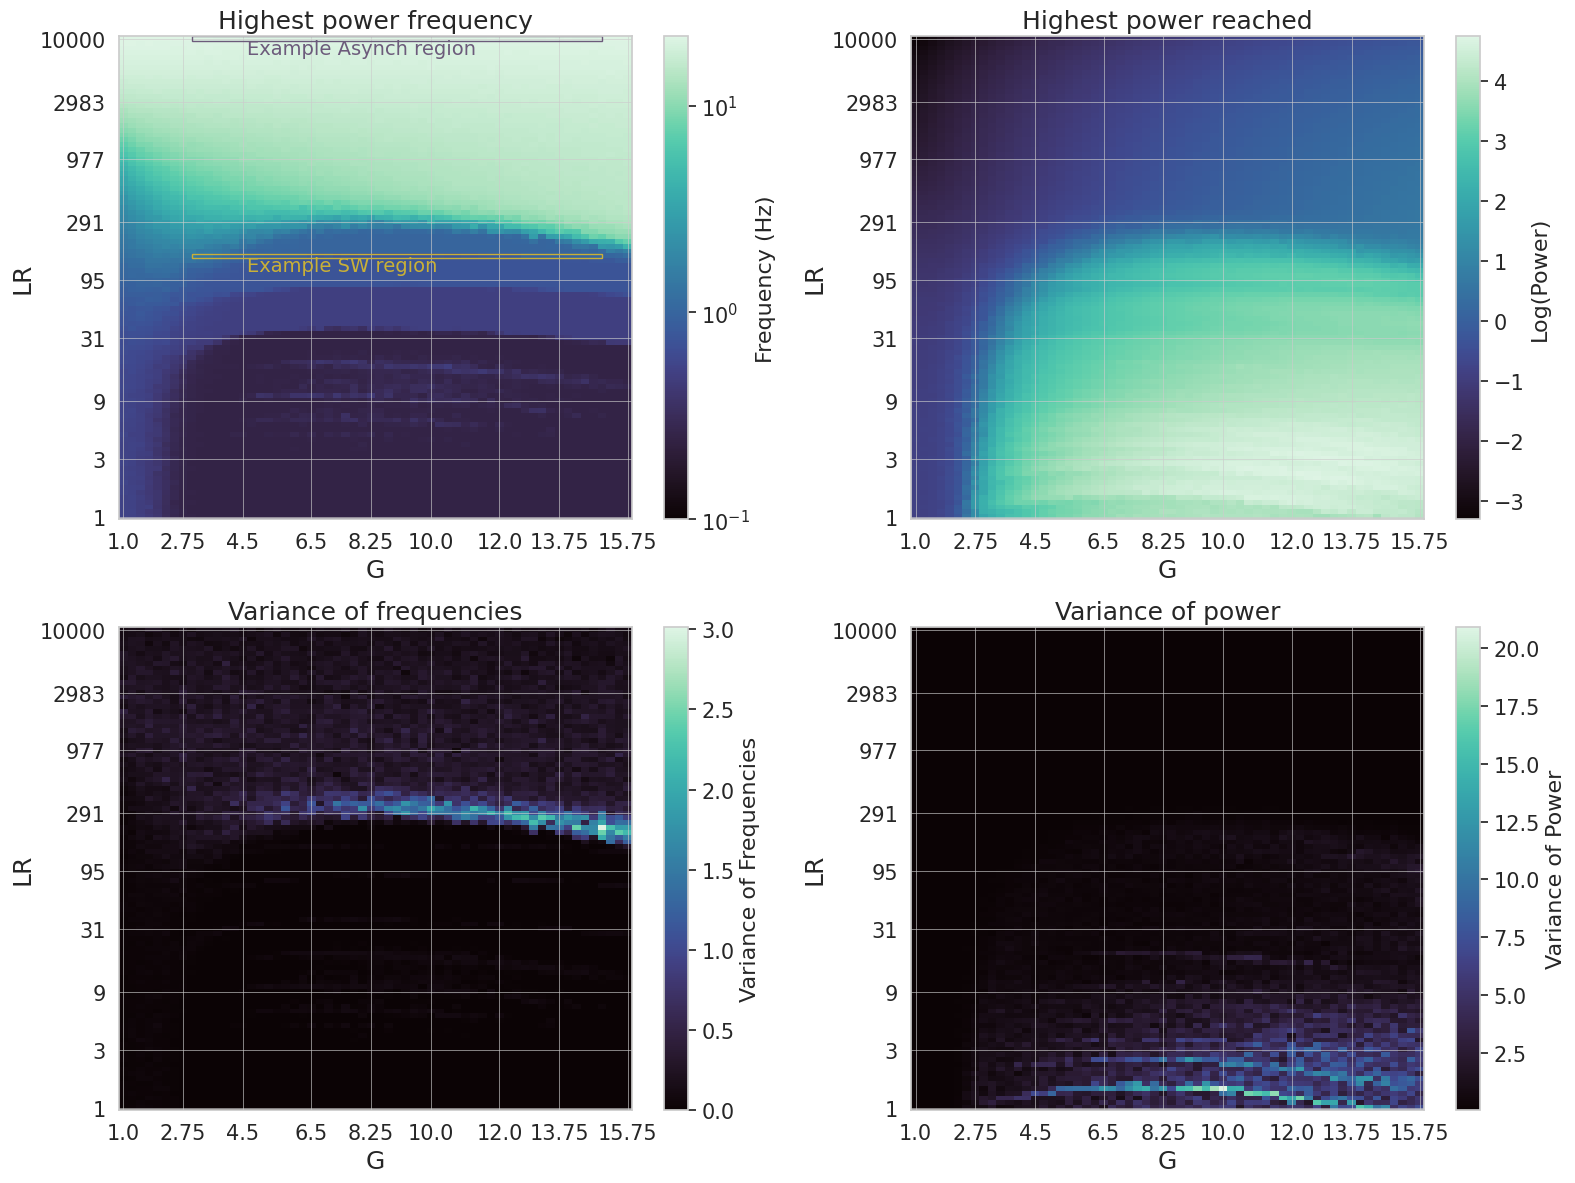

In [37]:
from matplotlib.colors import LogNorm
from matplotlib.patches import Rectangle

fig, axs = plt.subplots(2, 2, figsize=(16, 12))
TICKS = 15
LABEL = 18
COLORBAR = 16

figname_base = 'FIG_5_'

# FIG_2_A: Heatmap for max_freq_grid (Log Normalization)
im1 = axs[0, 0].imshow(mean_max_freq, aspect='auto', cmap='mako',
                       norm=LogNorm(vmin=0.1, vmax=mean_max_freq.max()),
                       origin='upper')
cbar1 = fig.colorbar(im1, ax=axs[0, 0])
#v1 = np.linspace(mean_max_freq[mean_max_freq > 0].min(), 15, 10)
#v1 = [mean_max_freq[mean_max_freq > 0].min(),1,10]
#cbar1.set_ticks(v1[:-4])  # Remove the 3 ticks preceding the last tick
#cbar1.set_ticklabels([f"{val:.1f}" for val in v1[:-4]])  # Format tick labels to one decimal place
#cbar1.set_ticks(v1)  # Remove the 3 ticks preceding the last tick
#cbar1.set_ticklabels([f"{val:.1f}" for val in v1])  # Format tick labels to one decimal place
cbar1.minorticks_off()
cbar1.set_label('Frequency (Hz)', fontsize=COLORBAR)
cbar1.ax.tick_params(labelsize=TICKS)

# Define G nd LR ranges
G_max = 16
G_step = 0.25
G_range = np.arange(1, G_max, G_step)
LR_range = np.logspace(0, 4, 100)

# Define tick indices and labels
lr_tick_indices = np.linspace(0, len(LR_range) - 1, 9, dtype=int)
lr_tick_labels = np.round(LR_range[lr_tick_indices], 2)
G_tick_indices = np.linspace(0, len(G_range) - 1, 9, dtype=int)
G_tick_labels = np.round(G_range[G_tick_indices], 2)

col_pal_sw_asynch = ['#C9B037','#6C5B7B']

# Add fine red lines and annotations
G_3_idx = np.argmin(np.abs(G_range - 3))
G_16_idx = np.argmin(np.abs(G_range - 15))
lr_100_idx = np.argmin(np.abs(LR_range - 150))
# draw a rectangle spanning G_3_idx→G_16_idx at the LR index
rect = Rectangle(
    (G_3_idx, lr_100_idx - 0.5),          # lower-left corner
    G_16_idx - G_3_idx,                   # width
    1,                                     # height = 1 cell
    linewidth=1,
    edgecolor=col_pal_sw_asynch[0],
    facecolor='none'
)
axs[0, 0].add_patch(rect)
axs[0, 0].text(14.5, lr_100_idx, 'Example SW region', color=col_pal_sw_asynch[0], fontsize=LABEL-4, verticalalignment='top')
lr_1000_idx = np.argmin(np.abs(LR_range - 10150))
# draw a rectangle spanning G_3_idx→G_16_idx at the LR index
rect_asynch = Rectangle(
    (G_3_idx, lr_1000_idx - 0.5),          # lower-left corner
    G_16_idx - G_3_idx,                   # width       
    1,                                     # height = 1 cell
    linewidth=1,
    edgecolor=col_pal_sw_asynch[1],
    facecolor='none'
)
axs[0, 0].add_patch(rect_asynch)
axs[0, 0].text(14.5, lr_1000_idx, 'Example Asynch region', color=col_pal_sw_asynch[1], fontsize=LABEL-4, verticalalignment='top')

# Tick settings
axs[0, 0].set_xticks(G_tick_indices)
axs[0, 0].set_xticklabels(G_tick_labels, fontsize=TICKS)
axs[0, 0].set_yticks(lr_tick_indices)
axs[0, 0].set_yticklabels([int(label) for label in lr_tick_labels], fontsize=TICKS)
axs[0, 0].invert_yaxis()

# Labels and Title
axs[0, 0].set_xlabel('G', fontsize=LABEL)
axs[0, 0].set_ylabel('LR', fontsize=LABEL)
axs[0, 0].set_title('Highest power frequency', fontsize=TITLE)

# FIG_2_B: Heatmap for max_power_grid (Normal Display with log scale)
im2 = axs[0, 1].imshow(np.log(mean_max_power), aspect='auto', cmap='mako', origin='upper')
cbar2 = fig.colorbar(im2, ax=axs[0, 1])
cbar2.set_label('Log(Power)', fontsize=COLORBAR)
cbar2.ax.tick_params(labelsize=TICKS)

# Tick settings
axs[0, 1].set_xticks(G_tick_indices)
axs[0, 1].set_xticklabels(G_tick_labels, fontsize=TICKS)
axs[0, 1].set_yticks(lr_tick_indices)
axs[0, 1].set_yticklabels([int(label) for label in lr_tick_labels], fontsize=TICKS)
axs[0, 1].invert_yaxis()

# Labels and Title
axs[0, 1].set_xlabel('G', fontsize=LABEL)
axs[0, 1].set_ylabel('LR', fontsize=LABEL)
axs[0, 1].set_title('Highest power reached', fontsize=TITLE)

# Compute std values
std_max_freq = max_freq_grid.std(axis=0).T
std_max_power = max_power_grid.std(axis=0).T

# FIG_2_C: Heatmap for std_max_freq
im3 = axs[1, 0].imshow(std_max_freq, aspect='auto', cmap='mako', origin='upper')
cbar3 = fig.colorbar(im3, ax=axs[1, 0])
cbar3.set_label('Variance of Frequencies', fontsize=COLORBAR)
cbar3.ax.tick_params(labelsize=TICKS)

# Tick settings
axs[1, 0].set_xticks(G_tick_indices)
axs[1, 0].set_xticklabels(G_tick_labels, fontsize=TICKS)
axs[1, 0].set_yticks(lr_tick_indices)
axs[1, 0].set_yticklabels([int(label) for label in lr_tick_labels], fontsize=TICKS)
axs[1, 0].invert_yaxis()

# Labels and Title
axs[1, 0].set_xlabel('G', fontsize=LABEL)
axs[1, 0].set_ylabel('LR', fontsize=LABEL)
axs[1, 0].set_title('Variance of frequencies', fontsize=TITLE)

# FIG_2_D: Heatmap for std_max_power
im4 = axs[1, 1].imshow(std_max_power, aspect='auto', cmap='mako', origin='upper')
cbar4 = fig.colorbar(im4, ax=axs[1, 1])
cbar4.set_label('Variance of Power', fontsize=COLORBAR)
cbar4.ax.tick_params(labelsize=TICKS)

# Tick settings
axs[1, 1].set_xticks(G_tick_indices)
axs[1, 1].set_xticklabels(G_tick_labels, fontsize=TICKS)
axs[1, 1].set_yticks(lr_tick_indices)
axs[1, 1].set_yticklabels([int(label) for label in lr_tick_labels], fontsize=TICKS)
axs[1, 1].invert_yaxis()

# Labels and Title
axs[1, 1].set_xlabel('G', fontsize=LABEL)
axs[1, 1].set_ylabel('LR', fontsize=LABEL)
axs[1, 1].set_title('Variance of power', fontsize=TITLE)

plt.tight_layout()
plt.savefig(figfold + figname_base + 'Combined.png', dpi=300)
plt.savefig(figfold + figname_base + 'Combined.svg', dpi=300)
plt.show()


## Overlapping fitting with slow waves

## Plotting timeserires and autocorrelation function

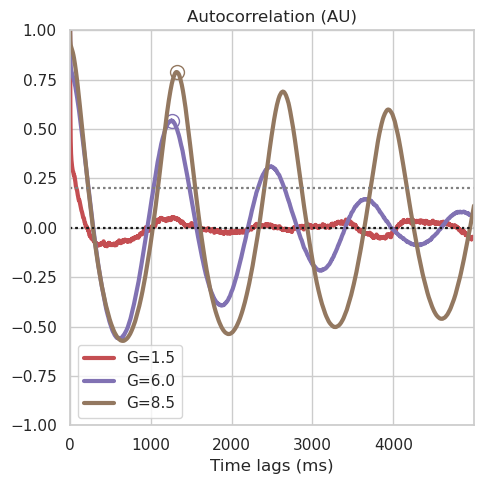

In [54]:
t_len = np.shape(acorrs)[1]
max_t = 5000
acor_tbase = np.arange(0,max_t)
acor_tbase_s = np.arange(0,max_t)*0.001
xcorr_tbase = np.arange(- max_t/2, max_t/2)

# Extacting max of the xcorr
sel_xcorr = np.vstack(([x[int(t_len - max_t/2):int(t_len + max_t/2)] for x in xcorr_rate_fic]))
max_xcorr_id = np.argmax(sel_xcorr, axis=1)
min_xcorr_id = np.argmin(sel_xcorr, axis=1)
# [[[sel_xcorr[x,min_xcorr_id[x]] for x in range(3)], xcorr_tbase[min_xcorr_id]],
# [[sel_xcorr[x,max_xcorr_id[x]] for x in range(3)], xcorr_tbase[max_xcorr_id]]]


pp = list()
figname = 'autocorr_and_cross_corr'
fig = plt.figure(figsize=(10, 5))
for e in range(3):
    plt.subplot(1,2,1)
    plt.plot(acor_tbase, acorrs[e,0:max_t], 
         color=col_pal[3+e], linewidth=3, label='G='+str(gvals_tseries[e]))
    if e>0:
        plt.plot(acorr_time[e],acorr_peak[e],'o',color=col_pal[3+e],
                 markersize=10, fillstyle='none')
    pp.append(auxp)
    plt.ylim([-1,1])
    plt.title('Autocorrelation (AU)')
    plt.xlabel('Time lags (ms)')
    plt.plot([acor_tbase[0],acor_tbase[-1]],[0,0],'k:')
    plt.plot([acor_tbase[0],acor_tbase[-1]],[0.2,0.2],':',color=[0.5,0.5,0.5])
    plt.xlim([acor_tbase[0],acor_tbase[-1]])
    if e==2:
        plt.legend()
    
    plt.subplot(1,2,2)
    plt.plot(xcorr_tbase, xcorr_rate_fic[e][int(t_len - max_t/2):int(t_len + max_t/2)], 
             color=col_pal[3+e], linewidth=3)
    plt.plot(xcorr_tbase[max_xcorr_id[e]], sel_xcorr[e,max_xcorr_id[e]],
            'o',color=col_pal[3+e],markersize=10, fillstyle='none')
    plt.plot(xcorr_tbase[min_xcorr_id[e]], sel_xcorr[e,min_xcorr_id[e]],
        'o',color=col_pal[3+e],markersize=10, fillstyle='none')
    plt.ylim([-1,1])
    plt.plot([0,0],[-1,1],'k:')
    plt.plot([xcorr_tbase[0],xcorr_tbase[-1]],[0,0],'k:')
    plt.xlim([xcorr_tbase[0],xcorr_tbase[-1]])
    plt.title('Cross-correlation ($<r^E>_{WB}$,<FIC>) (AU)')
    plt.xlabel('Time lags (ms)')
    



plt.tight_layout()
fig.savefig(figfold+figname+'.png', dpi=300)
fig.savefig(figfold+figname+'.pdf')
plt.show()

In [44]:
t_len = np.shape(acorrs)[1]
max_t = 5000
acor_tbase = np.arange(0,max_t)
acor_tbase_s = np.arange(0,max_t)*0.001
xcorr_tbase = np.arange(- max_t/2, max_t/2)

# Extacting max of the xcorr
sel_xcorr = np.vstack(([x[int(t_len - max_t/2):int(t_len + max_t/2)] for x in xcorr_rate_fic]))
max_xcorr_id = np.argmax(sel_xcorr, axis=1)
min_xcorr_id = np.argmin(sel_xcorr, axis=1)
# [[[sel_xcorr[x,min_xcorr_id[x]] for x in range(3)], xcorr_tbase[min_xcorr_id]],
# [[sel_xcorr[x,max_xcorr_id[x]] for x in range(3)], xcorr_tbase[max_xcorr_id]]]


pp = list()
figname = 'autocorr_and_cross_corr'
fig = plt.figure(figsize=(10, 5))
for e in range(3):
    plt.subplot(1,1,1)
    plt.plot(acor_tbase, acorrs[e,0:max_t], 
         color=col_pal[3+e], linewidth=3, label='G='+str(gvals_tseries[e]))
    if e>0:
        plt.plot(acorr_time[e],acorr_peak[e],'o',color=col_pal[3+e],
                 markersize=10, fillstyle='none')
    pp.append(auxp)
    plt.ylim([-1,1])
    plt.title('Autocorrelation (AU)')
    plt.xlabel('Time lags (ms)')
    plt.plot([acor_tbase[0],acor_tbase[-1]],[0,0],'k:')
    plt.plot([acor_tbase[0],acor_tbase[-1]],[0.2,0.2],':',color=[0.5,0.5,0.5])
    plt.xlim([acor_tbase[0],acor_tbase[-1]])
    if e==2:
        plt.legend()




plt.tight_layout()
plt.show()

NameError: name 'acorrs' is not defined

In [ ]:
# Sanity checks
fig = plt.figure(figsize=(14, 10))

# Correlation SC-FC
plt.subplot(2,4,1)
plt.imshow(np.mean(corr_to_sc_grid,axis=0).T,vmin=0, vmax=1,cmap='inferno', 
           interpolation='none',origin='lower', aspect='auto')
plt.yticks(ticks=np.arange(0,nlrs+1,10),labels=np.floor(10*np.logspace(0,3,11))/10)
plt.xticks(ticks=np.arange(0,ngs+1,10), labels=np.linspace(1,G_max,7))
plt.ylabel('Learning Rate')
plt.xlabel('Global Coupling')
plt.colorbar(label='Corr(SC,FC)')


plt.subplot(2,4,2)
plt.imshow(np.mean(corr_to_sc_grid,axis=0).T,vmin=0, vmax=1,cmap='inferno', 
           interpolation='none',origin='lower', aspect='auto')
plt.yticks(ticks=np.arange(0,nlrs+1,10),labels=np.floor(10*np.logspace(0,3,11))/10)
plt.xticks(ticks=np.arange(0,ngs+1,10), labels=np.linspace(1,G_max,7))
plt.ylabel('Learning Rate')
plt.xlabel('Global Coupling')
plt.colorbar(label='Corr(SC,FC)')

# Chimeras

In [ ]:
# Define the data folder path
datafolder = '/home/ivan.mindlin/Desktop/DatosParaRuben/'

# Load the data
e_rates_dyn_list = np.load(datafolder + 'slow_waves/time_series_examples/LR_rates_results.npy', allow_pickle=True)
e_rates_tseries = np.load(datafolder+'slow_waves/time_series_examples/rates_results.npy')
inh_rates_dyn_list = np.load(datafolder + 'slow_waves/time_series_examples/LR_rates_inh_results.npy', allow_pickle=True)
fic_dyn_list = np.load(datafolder + 'slow_waves/time_series_examples/LR_fic_t_results.npy', allow_pickle=True)
LR_values = np.load(datafolder + 'slow_waves/time_series_examples/LR_LR_values.npy', allow_pickle=True)
params = np.load(datafolder + 'slow_waves/time_series_examples/LR_params.npy', allow_pickle=True)

In [3]:
figfold = '/home/ivan.mindlin/Desktop/DatosParaRuben/Figuras/panels/'

/tmp/ipykernel_170652/3633267038.py:38: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


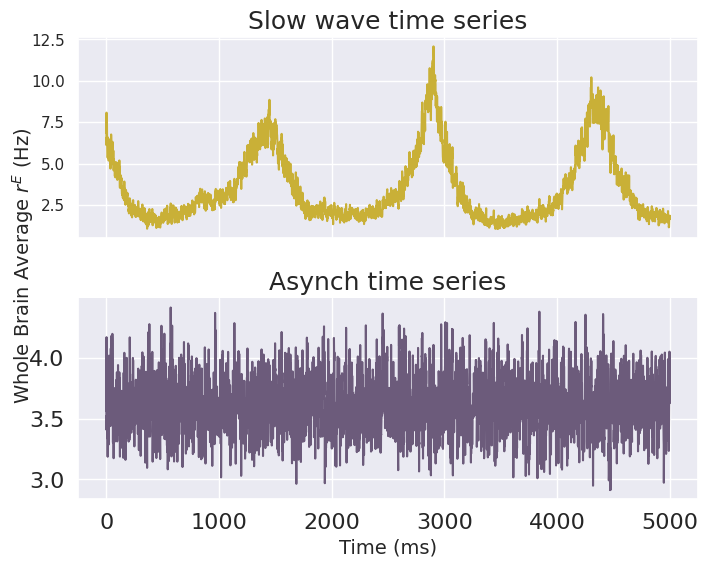

In [116]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Font sizes (using notebook variables)
TITLE = 18
LABEL = 14
TICKS = 16
LEGEND = 16

max_t = 5000
acor_tbase = np.arange(0, max_t)
figname = 'FIG_6_A'
col_pal_sw_asynch = ['#C9B037','#6C5B7B']
START = 0
# Create the figure with two subplots (for LR=100 and LR=10000) at G=0.5
fig, axes = plt.subplots(2, 1, figsize=(8, 6), gridspec_kw={'hspace': 0.3})


ax = axes[0]
# Plot the average excitatory rate for the i-th dyn time series sample
ax.plot(acor_tbase, np.mean(e_rates_tseries[2, :, START:START+max_t], axis=0), color=col_pal_sw_asynch[0])

# Set title with the corresponding LR value and fixed G=0.5
ax.set_title(f'Slow wave time series', fontsize=TITLE)
#ax.set_xticks([])
ax.set_xticklabels([])
ax = axes[1]
ax.plot(acor_tbase, np.mean(e_rates_dyn_list[1, :, START:START+max_t], axis=0), color=col_pal_sw_asynch[1])
ax.set_title(f'Asynch time series', fontsize=TITLE)
ax.set_xlabel('Time (ms)', fontsize=LABEL)
# Hide the top spine
ax.spines['top'].set_visible(False)
ax.tick_params(axis='both', labelsize=TICKS)

# Add a shared ylabel in the middle of both subplots
fig.text(0.04, 0.5, r'Whole Brain Average $r^E$ (Hz)', va='center', rotation='vertical', fontsize=LABEL)
plt.tight_layout()
# Save the figure
fig.savefig(figfold + figname + '.png', dpi=300)
fig.savefig(figfold + figname + '.svg', dpi=300)
plt.show()


In [43]:
from joblib import Parallel, delayed
from scipy.signal import welch
import fastdyn_fic_dmf as dmf
def sim_run(G, LR, SEED, NB_STEPS=50000):
    """
    INPUTS:
    G: float, global coupling
    LR: array, learning rate (Homogeneous or heterogenos. Decay will be calcualted for each region with this)
    SEED: int, random seed
    OUTPUTS:
    rates_dyn: np.array, dynamic of rates
    rates_inh_dyn: np.array, dynamic of inhibitory rates
    bold_dyn: np.array, dynamic of BOLD signal
    fic_t_dyn: np.array, dynamic of FIC

    """
    
    params = dmf.default_params(C=C)
    fit_res = np.load("./data/fit_res_3-44.npy")
    b = fit_res[0] # First element is the slope
    a = fit_res[1]
    params['G'] = G
    params['seed'] = SEED
    params['obj_rate'] = 3.44
    DECAY = np.exp(a+np.log(LR)*b)    
    params['lr_vector'] = LR
    params['taoj_vector'] =  DECAY
    params['J'] = 0.75*params['G']*params['C'].sum(axis=0).squeeze() + 1
    params["with_decay"] = True
    params["with_plasticity"] = True
    params['return_bold'] = False
    params["return_fic"] = True
    params["return_rate"] = True
    rates_dyn, rates_inh_dyn, _, fic_t_dyn = dmf.run(params, NB_STEPS)
    return rates_dyn, rates_inh_dyn, fic_t_dyn

def sim_run_notplastic(G, SEED, NB_STEPS=50000):
    """
    INPUTS:
    G: float, global coupling    
    SEED: int, random seed
    OUTPUTS:
    rates_dyn: np.array, dynamic of rates    

    """
    
    params = static_dmf.default_params(C=C)    
    params['G'] = G
    params['seed'] = SEED
    params['obj_rate'] = 3.44    
    params['J'] = 0.75*params['G']*params['C'].sum(axis=0).squeeze() + 1        
    rates_dyn = static_dmf.run(params, NB_STEPS,'rate')
    return rates_dyn

import numpy as np

def vectorize_along_axis(axis=0):
    def decorator(func):
        def wrapper(data, *args, **kwargs):
            # if the data is 1D, just call the function directly
            if data.ndim == 1:
                return func(data, *args, **kwargs)
            # otherwise, apply the function along the specified axis
            return np.apply_along_axis(func, axis, data, *args, **kwargs)
        return wrapper
    return decorator

@vectorize_along_axis(axis=0)
def get_autcorr(rates):
    """Get the autocorrelation function from a 1D rates vector."""
    signal = rates - np.mean(rates)
    # Calculate autocorrelation function (full convolution)
    autocorr = np.correlate(signal, signal, mode='full')
    # Normalize: divide by the variance and length of the signal
    autocorr = autocorr / (np.var(signal) * len(signal))
    # Only keep the second half (non-negative lags)
    autocorr = autocorr[len(signal)-1:]
    return autocorr


def get_max_freq_and_power(rates):
    freqs, psd = welch(rates, fs=1000,axis=1,nperseg=4*1000,noverlap=2*1000)
    max_freq_id = np.argmax(psd[:,:100],axis=1)
    max_freqs = freqs[max_freq_id]
    max_power = np.max(psd[:,:100],axis=1)
    return max_freqs, max_power,freqs,psd

def get_avg_max_freq_and_power(rates_avg):
    freqs, psd = welch(rates_avg, fs=1000,axis=0,nperseg=4*1000,noverlap=2*1000)
    max_freq_id = np.argmax(psd[:100])
    max_freqs = freqs[max_freq_id]
    max_power = np.max(psd[:100])
    return max_freqs, max_power,freqs,psd

import numpy as np
import os
from joblib import Parallel, delayed

LR_HOMO = 100
LR_HOMO_VEC = np.ones(200)*LR_HOMO
SEED = 1
MAX_LAGS = 500
BURNOUT = 5000
AUTOCORR_TMAX = 5000
NB_STEPS = 55000
G_VAL = 3.5
SEED_BASE = 100
N = C.shape[0]

def run_simulation(idx, lr):
    SEED = SEED_BASE + idx
    # Create a homogeneous LR vector for all regions
    LR_VEC = np.ones(N) * lr
    # Run simulation (assuming sim_run returns rates, inhibitory rates and fic_t in that order)
    rates, _, _ = sim_run(G_VAL, LR_VEC, SEED, NB_STEPS)
    # Discard burnout period
    return rates[:, BURNOUT:]

def run_simulation_heterogeneous(idx, lr_hom, lr_het,het_regions_idx):
    SEED = SEED_BASE + idx
    # Create a homogeneous LR vector for all regions
    LR_VEC = np.ones(N) * lr_hom
    LR_VEC[het_regions_idx] = lr_het
    # Run simulation (assuming sim_run returns rates, inhibitory rates and fic_t in that order)
    rates, _, _ = sim_run(G_VAL, LR_VEC, SEED, NB_STEPS)
    # Discard burnout period
    return rates[:, BURNOUT:]

def run_simulation_notplastic(idx):
    SEED = SEED_BASE + idx    
    # Run simulation (assuming sim_run returns rates, inhibitory rates and fic_t in that order)
    rates = sim_run_notplastic(G_VAL_NOTPLASTIC, SEED, NB_STEPS)
    # Discard burnout period
    return rates[:, BURNOUT:]


In [44]:
data_folder = "/network/iss/cohen/data/Ivan/dyn_fic_dmf_simulations/Results"
NB_STEPS = 55000
# Create a HIGH_LR homogeneous simaultion
HIGH_LR = 10000
NREPS = 100
G_VAL = 3.5
if os.path.exists(f"{data_folder}/homogeneous/g_{G_VAL}_lr_{HIGH_LR}_{NREPS}reps_{NB_STEPS//1000}ksteps.npy"):
    print("Loading high lr")
    rates_all_high_lr = np.load(f"{data_folder}/homogeneous/g_{G_VAL}_lr_{HIGH_LR}_{NREPS}reps_{NB_STEPS//1000}ksteps.npy")
else:
    simulations = Parallel(n_jobs=64)(delayed(run_simulation)(idx, HIGH_LR) for idx in range(NREPS))
    rates_all_high_lr = np.array(simulations)
    save_path = f"{data_folder}/homogeneous/g_{G_VAL}_lr_{HIGH_LR}_{NREPS}reps_{NB_STEPS//1000}ksteps.npy"
    np.save(save_path, rates_all_high_lr)
# Create a LOW_LR homogeneous simaultion
LOW_LR = 100
# If the file already exists, load it instead of running the simulation
if os.path.exists(f"{data_folder}/homogeneous/g_{G_VAL}_lr_{LOW_LR}_{NREPS}reps_{NB_STEPS//1000}ksteps.npy"):
    print("Loading low lr")
    rates_all_low_lr = np.load(f"{data_folder}/homogeneous/g_{G_VAL}_lr_{LOW_LR}_{NREPS}reps_{NB_STEPS//1000}ksteps.npy")
else:
    simulations = Parallel(n_jobs=64)(delayed(run_simulation)(idx, LOW_LR) for idx in range(NREPS))
    rates_all_low_lr = np.array(simulations)
    save_path = f"{data_folder}/homogeneous/g_{G_VAL}_lr_{LOW_LR}_{NREPS}reps_{NB_STEPS//1000}ksteps.npy"
    np.save(save_path, rates_all_low_lr)





Loading high lr
Loading low lr


In [45]:
# load rates_all_low_lr and rates_all_high_lr
rates_all_low_lr = np.load(f"{data_folder}/rates_all_low_lr.npy")
rates_all_high_lr = np.load(f"{data_folder}/rates_all_high_lr.npy")

In [46]:
# High LR
results_high_lr = Parallel(n_jobs=32)(delayed(get_max_freq_and_power)(rates) for rates in rates_all_high_lr)
max_freqs_all_high_lr, max_powers_all_high_lr, freqs_all_high_lr, psd_all_high_lr = zip(*results_high_lr)
max_freqs_all_high_lr = np.array(max_freqs_all_high_lr)
max_powers_all_high_lr = np.array(max_powers_all_high_lr)
freqs_all_high_lr = np.array(freqs_all_high_lr)
psd_all_high_lr = np.array(psd_all_high_lr)

# Low LR
results_low_lr = Parallel(n_jobs=32)(delayed(get_max_freq_and_power)(rates) for rates in rates_all_low_lr)
max_freqs_all_low_lr, max_powers_all_low_lr, freqs_all_low_lr, psd_all_low_lr = zip(*results_low_lr)
max_freqs_all_low_lr = np.array(max_freqs_all_low_lr)
max_powers_all_low_lr = np.array(max_powers_all_low_lr)
freqs_all_low_lr = np.array(freqs_all_low_lr)
psd_all_low_lr = np.array(psd_all_low_lr)

In [47]:
rates_avg_reg_high_lr = np.mean(rates_all_high_lr, axis=0)
rates_avg_reg_low_lr = np.mean(rates_all_low_lr, axis=0)
# High LR
results_high_lr = Parallel(n_jobs=16)(delayed(get_avg_max_freq_and_power)(rates) for rates in rates_avg_reg_high_lr)
max_freqs_avg_high_lr, max_powers_avg_high_lr, freqs_all_avg_high_lr, psd_all_avg_high_lr = zip(*results_high_lr)
max_freqs_avg_high_lr = np.array(max_freqs_avg_high_lr)
max_powers_avg_high_lr = np.array(max_powers_avg_high_lr)
freqs_all_avg_high_lr = np.array(freqs_all_avg_high_lr)
psd_all_avg_high_lr = np.array(psd_all_avg_high_lr)

# Low LR
results_low_lr = Parallel(n_jobs=16)(delayed(get_avg_max_freq_and_power)(rates) for rates in rates_avg_reg_low_lr)
max_freqs_avg_low_lr, max_powers_avg_low_lr, freqs_all_avg_low_lr, psd_all_avg_low_lr = zip(*results_low_lr)
max_freqs_avg_low_lr = np.array(max_freqs_avg_low_lr)
max_powers_avg_low_lr = np.array(max_powers_avg_low_lr)
freqs_all_avg_low_lr = np.array(freqs_all_avg_low_lr)
psd_all_avg_low_lr = np.array(psd_all_avg_low_lr)



In [48]:
from bct import score_wu, rich_club_wu
C = loadmat('./data/DTI_fiber_consensus_HCP.mat')['connectivity'][:200, :200]
# Select the nodes with the hihgest node strength from SC matrix C
C = 0.2*C/np.max(C)
node_strength = np.mean(C,axis=0)
# Get the 10 lowest regions
most_connected = np.argsort(node_strength)[::-1]

score_levels = np.arange(0.02,1.6,0.01)
score_idxs = []
for level in score_levels:
    score, sn = score_wu(C,level)
    # Get the indices from score that have > 0 values
    if sn>0:
        score_idxs.append(np.where(np.sum(score,axis=0) > 0)[0]) 

Loading quimeric deltas
Significant difference for 13 regions: p-value = 0.0139
Significant difference for 78 regions: p-value = 0.0000
Significant difference for 102 regions: p-value = 0.0000
Significant difference for 134 regions: p-value = 0.0034
Significant difference for 152 regions: p-value = 0.0084


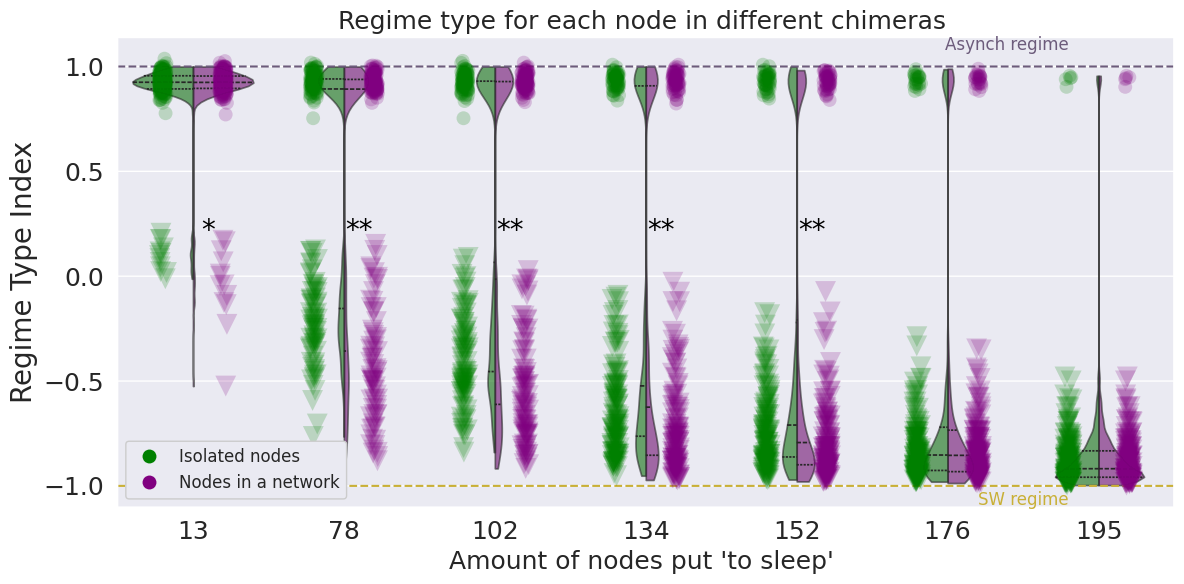

In [142]:
from matplotlib import markers
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
import pandas as pd
from matplotlib.lines import Line2D
sns.set(style="darkgrid")

G_VAL = 3.5
LR_HOMO = 10000
LR_HET = 100
score_lengths = [len(x) for x in score_idxs]
cherry_pick_scores_idx = [-1,-3,-5,-10,-15,-20,-30]
amount_of_regions = [score_lengths[x] for x in cherry_pick_scores_idx ]
if not os.path.exists(f"{data_folder}/Quimeric_LR{LR_HOMO}_to_{LR_HET}"):
    LR_HOMO_VEC = np.ones(200)*LR_HOMO
    MAX_LAGS = 500
    BURNOUT = 5000
    AUTOCORR_TMAX = 3000
    
    quimeric_delta = np.zeros((len(amount_of_regions),200))
    max_freqs_all_het = np.zeros((len(amount_of_regions),100,200))
    max_powers_all_het = np.zeros((len(amount_of_regions),100,200))
    for NTH_IDX,NTH in enumerate(amount_of_regions):
        print(f"Doing for {NTH} regions")
        SELECTED_REGIONS = most_connected[:NTH]
        LR_HET_VEC = LR_HOMO_VEC.copy()
        LR_HET_VEC[SELECTED_REGIONS] = LR_HET    
        print("Simulating")
        simulations = Parallel(n_jobs=32)(delayed(run_simulation_heterogeneous)(idx, LR_HOMO,LR_HET,SELECTED_REGIONS) for idx in range(100))
        rates_all_het = np.array(simulations)
        print("Calculating power")
        results = Parallel(n_jobs=32)(delayed(get_max_freq_and_power)(rates) for rates in rates_all_het)
        for idx, (max_freqs, max_powers, _, _) in enumerate(results):
            max_freqs_all_het[NTH_IDX,idx] = max_freqs
            max_powers_all_het[NTH_IDX,idx] = max_powers
        print("Crafting quimeric delta")    
        quimeric_delta[NTH_IDX] = 2 * (max_freqs_all_het[NTH_IDX].mean(axis=0) - max_freqs_all_low_lr.mean(axis=0)) / (max_freqs_all_high_lr.mean(axis=0) - max_freqs_all_low_lr.mean(axis=0)) - 1

    G_VAL = 3.5
    LR_HOMO = 10000
    LR_HOMO_VEC = np.ones(200)*LR_HOMO
    LR_HET = 100
    MAX_LAGS = 500
    BURNOUT = 5000
    AUTOCORR_TMAX = 3000
   

    quimeric_delta_score = np.zeros((len(cherry_pick_scores_idx),200))
    max_freqs_all_het_score = np.zeros((len(cherry_pick_scores_idx),100,200))
    max_powers_all_het_score = np.zeros((len(cherry_pick_scores_idx),100,200))
    for NTH_IDX,NTH in enumerate(cherry_pick_scores_idx):
        print(f"Doing for {NTH} regions")
        SELECTED_REGIONS = score_idxs[NTH]
        LR_HET_VEC = LR_HOMO_VEC.copy()
        LR_HET_VEC[SELECTED_REGIONS] = LR_HET    
        print("Simulating")
        simulations = Parallel(n_jobs=32)(delayed(run_simulation_heterogeneous)(idx, LR_HOMO,LR_HET,SELECTED_REGIONS) for idx in range(100))
        rates_all_het = np.array(simulations)
        print("Calculating power")
        results = Parallel(n_jobs=32)(delayed(get_max_freq_and_power)(rates) for rates in rates_all_het)
        for idx, (max_freqs, max_powers, _, _) in enumerate(results):
            max_freqs_all_het_score[NTH_IDX,idx] = max_freqs
            max_powers_all_het_score[NTH_IDX,idx] = max_powers
        print("Crafting quimeric delta")    
        quimeric_delta_score[NTH_IDX] = 2 * (max_freqs_all_het_score[NTH_IDX].mean(axis=0) - max_freqs_all_low_lr.mean(axis=0)) / (max_freqs_all_high_lr.mean(axis=0) - max_freqs_all_low_lr.mean(axis=0)) - 1

    os.mkdir(f"{data_folder}/Quimeric_LR{LR_HOMO}_to_{LR_HET}")
    # Save the results
    np.save(f"{data_folder}/Quimeric_LR{LR_HOMO}_to_{LR_HET}/quimeric_delta.npy", quimeric_delta)
    np.save(f"{data_folder}/Quimeric_LR{LR_HOMO}_to_{LR_HET}/quimeric_delta_score.npy", quimeric_delta_score)
    np.save(f"{data_folder}/Quimeric_LR{LR_HOMO}_to_{LR_HET}/max_freqs_all_het.npy", max_freqs_all_het)
    np.save(f"{data_folder}/Quimeric_LR{LR_HOMO}_to_{LR_HET}/max_freqs_all_het_score.npy", max_freqs_all_het_score)
    np.save(f"{data_folder}/Quimeric_LR{LR_HOMO}_to_{LR_HET}/max_powers_all_het.npy", max_powers_all_het)
    np.save(f"{data_folder}/Quimeric_LR{LR_HOMO}_to_{LR_HET}/max_powers_all_het_score.npy", max_powers_all_het_score)
else:
    # Load the previously saved data
    print("Loading quimeric deltas")
    quimeric_delta = np.load(f"{data_folder}/Quimeric_LR{LR_HOMO}_to_{LR_HET}/quimeric_delta.npy")
    quimeric_delta_score = np.load(f"{data_folder}/Quimeric_LR{LR_HOMO}_to_{LR_HET}/quimeric_delta_score.npy")
    max_freqs_all_het = np.load(f"{data_folder}/Quimeric_LR{LR_HOMO}_to_{LR_HET}/max_freqs_all_het.npy")
    max_freqs_all_het_score = np.load(f"{data_folder}/Quimeric_LR{LR_HOMO}_to_{LR_HET}/max_freqs_all_het_score.npy")
    max_powers_all_het = np.load(f"{data_folder}/Quimeric_LR{LR_HOMO}_to_{LR_HET}/max_powers_all_het.npy")
    max_powers_all_het_score = np.load(f"{data_folder}/Quimeric_LR{LR_HOMO}_to_{LR_HET}/max_powers_all_het_score.npy")



import matplotlib as mpl
mpl.rcParams['patch.force_edgecolor'] = False
#mpl.rcParams['path.snap'] = False    # prevent hairlines from snapping
#mpl.rcParams['patch.linewidth']    = 0


# Font sizes
TITLE = 18
LABEL = 18
TICKS = 18
LEGEND = 18

# Parameters
figname = 'FIG_6_C'
# 1) Build the actual selections for each amount
str_selections   = [most_connected[:N]        for N in amount_of_regions]
score_selections = [score_idxs[idx]           for idx in cherry_pick_scores_idx]
# 2) Turn them into Boolean masks of shape (n_amounts, n_regions)
str_mask   = np.array([[r in sel for r in range(N)] for sel in str_selections])
score_mask = np.array([[r in sel for r in range(N)] for sel in score_selections])
# 3) Flatten everything into one long vector
values        = np.concatenate([quimeric_delta.ravel(),        quimeric_delta_score.ravel()])
groups        = ['STR']   * quimeric_delta.size + ['S-CORE'] * quimeric_delta_score.size
amounts       = np.concatenate([
                    np.repeat(amount_of_regions, N),
                    np.repeat(amount_of_regions, N)
               ])
selected_flag = np.concatenate([str_mask.ravel(), score_mask.ravel()])


# 4) Build the DataFrame
data = pd.DataFrame({
    'value'             : values,
    'group'             : groups,
    'amount_of_regions' : amounts,
    'selected'          : selected_flag
})
# Create the figure
fig, ax = plt.subplots(figsize=(12, 6))

# Add dashed lines
ax.axhline(y=1, color=col_pal_sw_asynch[1], linestyle='--')
ax.text(5.8, 1.08, 'Asynch regime', color=col_pal_sw_asynch[1], fontsize=12, ha='right')

ax.axhline(y=-1, color=col_pal_sw_asynch[0], linestyle='--')
ax.text(5.8, -1.09, 'SW regime', color=col_pal_sw_asynch[0], fontsize=12, ha='right')

# Strip plot for all those that were not selected

data_non = data[data['selected'] == False]  # Filter out selected regions
# Strip plot
sns.stripplot(data=data_non, x='amount_of_regions', 
              y='value', hue='group', jitter=0.05, dodge=True, ax=ax, marker='o',linewidth=0,edgecolor=None,
              palette=['green', 'purple'], s=10, alpha=0.2)
# Stripplot on top of the same axes for selected regions
data_sel = data[data['selected'] == True]  # Filter out selected regions
# Strip plot for selected regions
sns.stripplot(data=data_sel, x='amount_of_regions', 
              y='value', hue='group', jitter=0.05, dodge=True, ax=ax, marker='v', linewidth=0,edgecolor=None,
              palette=['green', 'purple'], s=15, alpha=0.2)
strip_handles, strip_labels = ax.get_legend_handles_labels()
for h in strip_handles:
    h.set_alpha(1.0)

# Add a 'v' marker to the strip handle without any color
# add a red 'v' marker for the "Selected regions" legend entry
selected_handle = Line2D([0], [0],
                         marker='v',
                         markerfacecolor='grey',     
                         markeredgecolor='None',                    
                         linestyle='None',
                         markersize=10)

non_selected_handle = Line2D([0], [0],
                         marker='o',
                         markerfacecolor='grey',                         
                            markeredgecolor='None',
                         linestyle='None',
                         markersize=10)

selected_handles = [selected_handle, non_selected_handle]
selected_labels = ["Nodes put 'to sleep'", "Nodes 'awake'"]


# Violin plot
# Clip the data from 1 to -1
data['value'] = np.clip(data['value'], -1, 1)
sns.violinplot(data=data, x='amount_of_regions', y='value', hue='group', ax=ax, 
               palette=['green', 'purple'], split=True, inner='quartile', bw_method=0.1,cut=0, alpha=0.6)

# Statistical tests: compare STR and S-CORE per amount_of_regions.
unique_amounts = sorted(data['amount_of_regions'].unique())

for idx_amt,amt in enumerate(unique_amounts):
    subset = data[data['amount_of_regions'] == amt]
    values_str = subset[subset['group'] == 'STR']
    values_score = subset[subset['group'] == 'S-CORE']
    values_str = values_str[values_str['selected']]['value']
    values_score = values_score[values_score['selected']]['value']
    stat, p_val = ttest_ind(values_str, values_score)
    if p_val < 0.05:
        print(f"Significant difference for {amt} regions: p-value = {p_val:.4f}")
        y_max = subset['value'].max()
        # Annotate star above the max value with a small offset
        ax.text(0.1+idx_amt, 0.15, '**' if p_val<0.01 else '*' , ha='center', va='bottom', color='black', fontsize=20)

# Labels, title, and legend
ax.set_xlabel("Amount of nodes put 'to sleep' ", fontsize=LABEL)
ax.set_ylabel("Regime Type Index", fontsize=LABEL+2)
ax.set_title("Regime type for each node in different chimeras ", fontsize=TITLE)
ax.tick_params(axis='both', labelsize=TICKS)
ax.set_yticks([1, 0.5, 0, -0.5, -1])
# First legend: isolated vs network nodes
first_legend = ax.legend(
    strip_handles,
    ["Isolated nodes", "Nodes in a network"],
    fontsize=12,
    title_fontsize=14,
    loc='lower left',
    framealpha=1
)

# Layout and save
plt.tight_layout()
fig.savefig(os.path.join(figfold, figname + '.svg'), dpi=300)
#fig.savefig(os.path.join(figfold, figname + '.png'), dpi=300)
plt.show()



In [111]:
values_score

1400    0.898703
1401    0.873573
1402    0.897512
1403    0.886695
1404    0.960438
          ...   
1595    0.771147
1596    0.948361
1597    0.880162
1598    0.934669
1599    0.894173
Name: value, Length: 200, dtype: float64

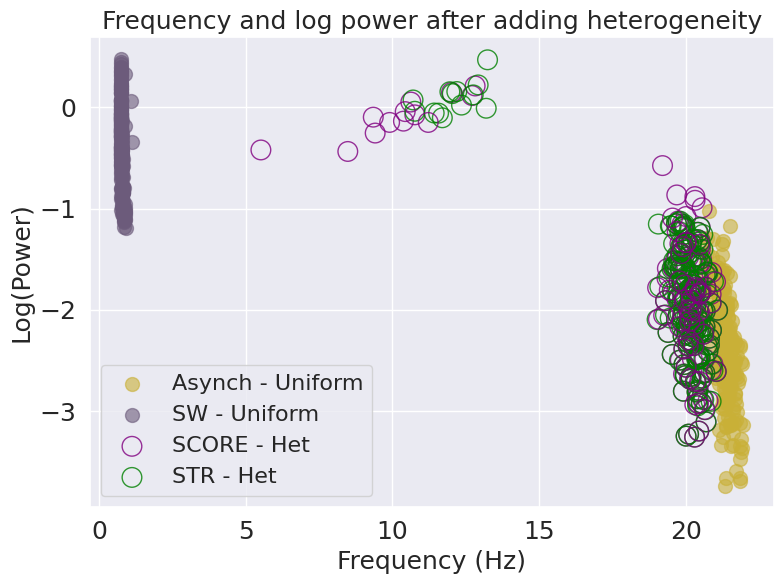

In [104]:
from turtle import color
import matplotlib.pyplot as plt

# Font sizes
TITLE = 18
LABEL = 18
TICKS = 18
LEGEND = 16

# Parameters
figname = 'FIG_6_B'

# Create the figure
fig, ax = plt.subplots(figsize=(8, 6))

# Scatter plots for high and low learning rates
ax.scatter(max_freqs_all_high_lr.mean(axis=0), np.log(max_powers_all_high_lr.mean(axis=0)), label="Asynch - Uniform", alpha=0.6, s=100,color=col_pal_sw_asynch[0])
ax.scatter(max_freqs_all_low_lr.mean(axis=0), np.log(max_powers_all_low_lr.mean(axis=0)), label="SW - Uniform", alpha=0.6, s=100,color=col_pal_sw_asynch[1])
split_idx = max_freqs_all_het.shape[-1] // 2
plt.scatter(max_freqs_all_het_score[0].mean(axis=0)[:split_idx+50], np.log(max_powers_all_het_score[0].mean(axis=0))[:split_idx+50], label="SCORE - Het", alpha=0.8, s=200, color='purple',facecolors='none',zorder=2)
plt.scatter(max_freqs_all_het[0].mean(axis=0)[:split_idx], np.log(max_powers_all_het[0].mean(axis=0))[:split_idx], label="STR - Het", alpha=0.8, s=200, color='green',facecolors='none',zorder=2)
plt.scatter(max_freqs_all_het[0].mean(axis=0)[split_idx:], np.log(max_powers_all_het[0].mean(axis=0))[split_idx:], label=None, alpha=0.8, s=200, color='green',facecolors='none',zorder=2)
plt.scatter(max_freqs_all_het_score[0].mean(axis=0)[split_idx+50:], np.log(max_powers_all_het_score[0].mean(axis=0))[split_idx+50:], label=None, alpha=0.8, s=200, color='purple',facecolors='none',zorder=2)

# Labels, title, and legend
ax.set_xlabel("Frequency (Hz)", fontsize=LABEL)
ax.set_ylabel("Log(Power)", fontsize=LABEL)
ax.set_title("Frequency and log power after adding heterogeneity", fontsize=TITLE)
ax.tick_params(axis='both', labelsize=TICKS)
ax.legend(fontsize=LEGEND)

# Layout and save
plt.tight_layout()
fig.savefig(os.path.join(figfold, figname + '.png'), dpi=300)
fig.savefig(figfold + figname + '.svg', dpi=300)
plt.show()


Loading quimeric deltas


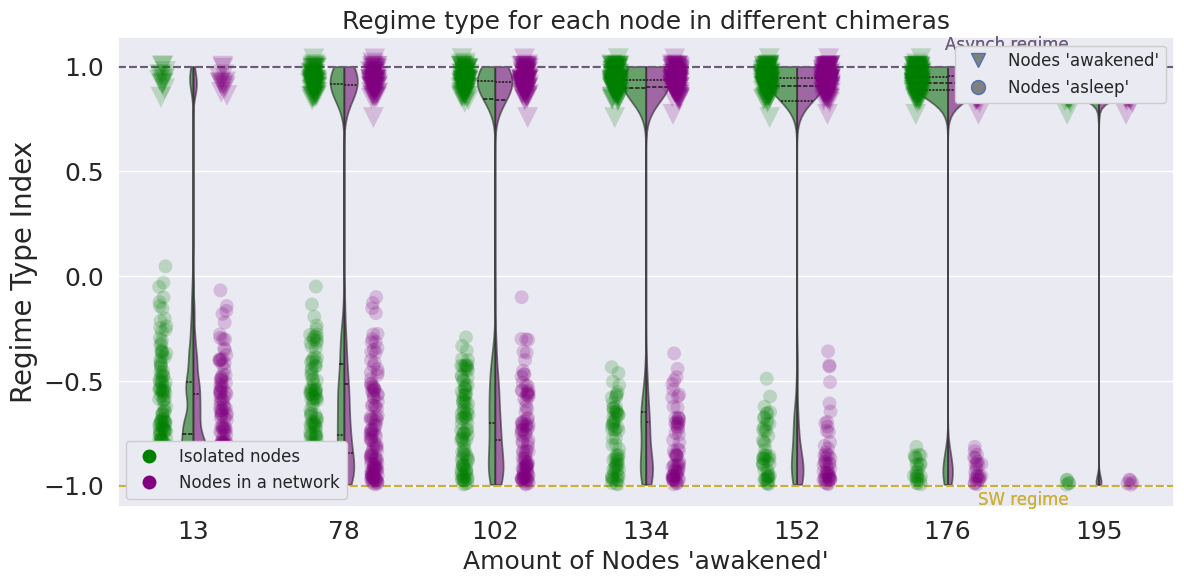

In [115]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


G_VAL = 3.5
LR_HOMO = 100
LR_HET = 10000
score_lengths = [len(x) for x in score_idxs]
cherry_pick_scores_idx = [-1,-3,-5,-10,-15,-20,-30]
amount_of_regions = [score_lengths[x] for x in cherry_pick_scores_idx ]
if not os.path.exists(f"{data_folder}/Quimeric_LR{LR_HOMO}_to_{LR_HET}"):
    LR_HOMO_VEC = np.ones(200)*LR_HOMO
    MAX_LAGS = 500
    BURNOUT = 5000
    AUTOCORR_TMAX = 3000
    
    quimeric_delta = np.zeros((len(amount_of_regions),200))
    max_freqs_all_het = np.zeros((len(amount_of_regions),100,200))
    max_powers_all_het = np.zeros((len(amount_of_regions),100,200))
    for NTH_IDX,NTH in enumerate(amount_of_regions):
        print(f"Doing for {NTH} regions")
        SELECTED_REGIONS = most_connected[:NTH]
        LR_HET_VEC = LR_HOMO_VEC.copy()
        LR_HET_VEC[SELECTED_REGIONS] = LR_HET    
        print("Simulating")
        simulations = Parallel(n_jobs=32)(delayed(run_simulation_heterogeneous)(idx, LR_HOMO,LR_HET,SELECTED_REGIONS) for idx in range(100))
        rates_all_het = np.array(simulations)
        print("Calculating power")
        results = Parallel(n_jobs=32)(delayed(get_max_freq_and_power)(rates) for rates in rates_all_het)
        for idx, (max_freqs, max_powers, _, _) in enumerate(results):
            max_freqs_all_het[NTH_IDX,idx] = max_freqs
            max_powers_all_het[NTH_IDX,idx] = max_powers
        print("Crafting quimeric delta")    
        quimeric_delta[NTH_IDX] = 2 * (max_freqs_all_het[NTH_IDX].mean(axis=0) - max_freqs_all_low_lr.mean(axis=0)) / (max_freqs_all_high_lr.mean(axis=0) - max_freqs_all_low_lr.mean(axis=0)) - 1

    G_VAL = 3.5
    LR_HOMO = 10000
    LR_HOMO_VEC = np.ones(200)*LR_HOMO
    LR_HET = 100
    MAX_LAGS = 500
    BURNOUT = 5000
    AUTOCORR_TMAX = 3000
   

    quimeric_delta_score = np.zeros((len(cherry_pick_scores_idx),200))
    max_freqs_all_het_score = np.zeros((len(cherry_pick_scores_idx),100,200))
    max_powers_all_het_score = np.zeros((len(cherry_pick_scores_idx),100,200))
    for NTH_IDX,NTH in enumerate(cherry_pick_scores_idx):
        print(f"Doing for {NTH} regions")
        SELECTED_REGIONS = score_idxs[NTH]
        LR_HET_VEC = LR_HOMO_VEC.copy()
        LR_HET_VEC[SELECTED_REGIONS] = LR_HET    
        print("Simulating")
        simulations = Parallel(n_jobs=32)(delayed(run_simulation_heterogeneous)(idx, LR_HOMO,LR_HET,SELECTED_REGIONS) for idx in range(100))
        rates_all_het = np.array(simulations)
        print("Calculating power")
        results = Parallel(n_jobs=32)(delayed(get_max_freq_and_power)(rates) for rates in rates_all_het)
        for idx, (max_freqs, max_powers, _, _) in enumerate(results):
            max_freqs_all_het_score[NTH_IDX,idx] = max_freqs
            max_powers_all_het_score[NTH_IDX,idx] = max_powers
        print("Crafting quimeric delta")    
        quimeric_delta_score[NTH_IDX] = 2 * (max_freqs_all_het_score[NTH_IDX].mean(axis=0) - max_freqs_all_low_lr.mean(axis=0)) / (max_freqs_all_high_lr.mean(axis=0) - max_freqs_all_low_lr.mean(axis=0)) - 1

    os.mkdir(f"{data_folder}/Quimeric_LR{LR_HOMO}_to_{LR_HET}")
    # Save the results
    np.save(f"{data_folder}/Quimeric_LR{LR_HOMO}_to_{LR_HET}/quimeric_delta.npy", quimeric_delta)
    np.save(f"{data_folder}/Quimeric_LR{LR_HOMO}_to_{LR_HET}/quimeric_delta_score.npy", quimeric_delta_score)
    np.save(f"{data_folder}/Quimeric_LR{LR_HOMO}_to_{LR_HET}/max_freqs_all_het.npy", max_freqs_all_het)
    np.save(f"{data_folder}/Quimeric_LR{LR_HOMO}_to_{LR_HET}/max_freqs_all_het_score.npy", max_freqs_all_het_score)
    np.save(f"{data_folder}/Quimeric_LR{LR_HOMO}_to_{LR_HET}/max_powers_all_het.npy", max_powers_all_het)
    np.save(f"{data_folder}/Quimeric_LR{LR_HOMO}_to_{LR_HET}/max_powers_all_het_score.npy", max_powers_all_het_score)
else:
    # Load the previously saved data
    print("Loading quimeric deltas")
    quimeric_delta = np.load(f"{data_folder}/Quimeric_LR{LR_HOMO}_to_{LR_HET}/quimeric_delta.npy")
    quimeric_delta_score = np.load(f"{data_folder}/Quimeric_LR{LR_HOMO}_to_{LR_HET}/quimeric_delta_score.npy")
    max_freqs_all_het = np.load(f"{data_folder}/Quimeric_LR{LR_HOMO}_to_{LR_HET}/max_freqs_all_het.npy")
    max_freqs_all_het_score = np.load(f"{data_folder}/Quimeric_LR{LR_HOMO}_to_{LR_HET}/max_freqs_all_het_score.npy")
    max_powers_all_het = np.load(f"{data_folder}/Quimeric_LR{LR_HOMO}_to_{LR_HET}/max_powers_all_het.npy")
    max_powers_all_het_score = np.load(f"{data_folder}/Quimeric_LR{LR_HOMO}_to_{LR_HET}/max_powers_all_het_score.npy")


# Font sizes

TITLE = 18
LABEL = 18
TICKS = 18
LEGEND = 18

# Parameters
figname = 'FIG_6_D'
str_selections   = [most_connected[:N]        for N in amount_of_regions]
score_selections = [score_idxs[idx]           for idx in cherry_pick_scores_idx]
# 2) Turn them into Boolean masks of shape (n_amounts, n_regions)
str_mask   = np.array([[r in sel for r in range(N)] for sel in str_selections])
score_mask = np.array([[r in sel for r in range(N)] for sel in score_selections])
# 3) Flatten everything into one long vector
values        = np.concatenate([quimeric_delta.ravel(),        quimeric_delta_score.ravel()])
groups        = ['STR']   * quimeric_delta.size + ['S-CORE'] * quimeric_delta_score.size
amounts       = np.concatenate([
                    np.repeat(amount_of_regions, N),
                    np.repeat(amount_of_regions, N)
               ])
selected_flag = np.concatenate([str_mask.ravel(), score_mask.ravel()])


# 4) Build the DataFrame
data = pd.DataFrame({
    'value'             : values,
    'group'             : groups,
    'amount_of_regions' : amounts,
    'selected'          : selected_flag
})
# Create the figure
fig, ax = plt.subplots(figsize=(12, 6))

# Add dashed lines
ax.axhline(y=1, color=col_pal_sw_asynch[1], linestyle='--')
ax.text(5.8, 1.08, 'Asynch regime', color=col_pal_sw_asynch[1], fontsize=12, ha='right')

ax.axhline(y=-1, color=col_pal_sw_asynch[0], linestyle='--')
ax.text(5.8, -1.09, 'SW regime', color=col_pal_sw_asynch[0], fontsize=12, ha='right')

# Strip plot for all those that were not selected

data_non = data[data['selected'] == False]  # Filter out selected regions
# Strip plot
sns.stripplot(data=data_non, x='amount_of_regions', 
              y='value', hue='group', jitter=0.05, dodge=True, ax=ax, marker='o',
              palette=['green', 'purple'], s=10, alpha=0.2)
# Stripplot on top of the same axes for selected regions
data_sel = data[data['selected'] == True]  # Filter out selected regions
# Strip plot for selected regions
sns.stripplot(data=data_sel, x='amount_of_regions', 
              y='value', hue='group', jitter=0.05, dodge=True, ax=ax, marker='v',
              palette=['green', 'purple'], s=15, alpha=0.2)
strip_handles, strip_labels = ax.get_legend_handles_labels()
for h in strip_handles:
    h.set_alpha(1.0)

# Add a 'v' marker to the strip handle without any color
# add a red 'v' marker for the "Selected regions" legend entry
selected_handle = Line2D([0], [0],
                         marker='v',
                         markerfacecolor='grey',                         
                         linestyle='None',
                         markersize=10)

non_selected_handle = Line2D([0], [0],
                         marker='o',
                         markerfacecolor='grey',                         
                         linestyle='None',
                         markersize=10)

selected_handles = [selected_handle, non_selected_handle]
selected_labels = ["Nodes 'awakened'", "Nodes 'asleep'"]

# Violin plot with the same settings as before
# Clip the data from 1 to -1
data['value'] = np.clip(data['value'], -1, 1)
sns.violinplot(data=data, x='amount_of_regions', y='value', hue='group', ax=ax, 
               palette=['green', 'purple'], split=True, inner='quartile', bw_method=0.1, cut=0, alpha=0.6)

# Add dashed lines using the same style as in the previous panel
ax.axhline(y=1, color=col_pal_sw_asynch[1], linestyle='--')
ax.text(5.8, 1.08, 'Asynch regime', color=col_pal_sw_asynch[1], fontsize=12, ha='right')

ax.axhline(y=-1, color=col_pal_sw_asynch[0], linestyle='--')
ax.text(5.8, -1.09, 'SW regime', color=col_pal_sw_asynch[0], fontsize=12, ha='right')

# Labels, title, and legend
ax.set_xlabel("Amount of Nodes 'awakened'", fontsize=LABEL)
ax.set_ylabel("Regime Type Index", fontsize=LABEL+2)
ax.set_title("Regime type for each node in different chimeras", fontsize=TITLE)
ax.tick_params(axis='both', labelsize=TICKS)
ax.set_yticks([1, 0.5, 0, -0.5, -1])
# Manually set the legend box position
# First legend: isolated vs network nodes
first_legend = ax.legend(
    strip_handles,
    ["Isolated nodes", "Nodes in a network"],
    fontsize=12,
    title_fontsize=14,
    loc='lower left',
    framealpha=1
)
# keep the first legend on the axes
ax.add_artist(first_legend)

# Second legend: selected vs non-selected regions
ax.legend(
    selected_handles,
    selected_labels,
    fontsize=12,
    title_fontsize=14,
    loc='upper right',
    framealpha=1
)
# Layout and save
plt.tight_layout()
fig.savefig(os.path.join(figfold, figname + '.png'), dpi=300)
fig.savefig(os.path.join(figfold, figname + '.svg'), dpi=300)
plt.show()
